https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

# Importing Dependencies 

In [84]:
#!pip install --upgrade nbformat
#!pip install --upgrade nbconvert


In [85]:
#pip install seaborn

In [86]:
#pip install scikit-learn

In [87]:
#pip install -U imbalanced-learn


In [217]:
import pandas as pd   #for handling dataset
import  numpy as np # for numerical calculation
import matplotlib.pyplot as plt # for plotting data 
import seaborn as sns # for plotting library
from sklearn.model_selection import StratifiedShuffleSplit # for stratified splitting
from imblearn.over_sampling import SMOTE # for performing SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV # for hyperparameter tunning
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [89]:
pd.set_option('display.max_columns', None)


# functions

In [90]:
def find_duplicate_columns(df):
    duplicate_columns = []
    for x in range(df.shape[1]):
        col = df.iloc[:, x]
        for y in range(x + 1, df.shape[1]):
            other_col = df.iloc[:, y]
            if col.equals(other_col):
                duplicate_columns.append(df.columns.values[y])
    return duplicate_columns

In [91]:
def categorize_amount(amount):
    if amount <= 2500:
        return '0-2500'
    else:
        return '2500-above'

# loading the main data file

In [92]:
creditcard_df = pd.read_csv('creditcard.csv')

# EDA

In [93]:
creditcard_df.head(5)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   

   Amount  Class  
0  149.62      0  
1    2.69      0  
2  378.66      0  
3  123.50      0  
4   69.99      0

In [94]:
creditcard_df.shape

(284807, 31)

In [95]:
creditcard_df.sample(5)

Time        V1        V2        V3        V4        V5        V6  \
203552  134867.0  0.652136 -2.665021 -1.188055  0.936334 -1.551520 -0.563665   
47567    43260.0 -0.061435 -2.384372  0.465032  0.680040 -1.376876  1.110578   
133350   80346.0 -0.465423  1.233448  1.326932  0.133223  0.627591 -0.329881   
159693  112817.0  2.087638 -0.049534 -1.711195 -0.013453  0.621326 -0.252317   
195290  130986.0 -0.587518  0.634814 -0.313554  0.113795  1.720935  5.245397   

              V7        V8        V9       V10       V11       V12       V13  \
203552  0.308211 -0.195627  1.566355 -0.474405 -1.147858 -0.471853 -1.448387   
47567  -0.160462  0.363938  0.880395 -0.567120  1.254812  1.151997 -0.589546   
133350  0.905475 -0.315033 -0.432166 -0.103066 -0.685178 -0.127694  1.018941   
159693  0.105375 -0.140522  0.319871  0.168580  0.470446  0.903863  0.432472   
195290 -1.003559 -1.350774  0.107469 -0.259712 -0.389986  0.240491 -0.339885   

             V14       V15       V16       V17       V18       V19       V20  \
203552  0.511822  1.348355  0.348462 -0.571603  0.744851 -0.519140  1.076529   
47567  -0.060495 -0.407336 -0.373248  0.485399 -0.860477 -0.222798  1.027213   
133350 -0.802071  1.301489  0.206855 -0.181259  0.106474  0.945685  0.349583   
159693  0.567583  0.095943  0.178202 -1.027970  0.635324  0.307990 -0.164136   
195290  0.210727  0.564322 -0.523822  0.121213  0.074528  0.304538 -0.494386   

             V21       V22       V23       V24       V25       V26       V27  \
203552  0.625063  0.335434 -0.476952 -0.034095 -0.369934 -0.628698 -0.083645   
47567   0.224984 -0.424369 -0.383269 -0.201544 -0.272319  0.891730 -0.116723   
133350 -0.332414 -0.692862 -0.229031 -0.485980 -0.102255  0.199805  0.025155   
159693  0.252366  0.840381 -0.058784  0.135728  0.353027 -0.123797 -0.027034   
195290  2.360674 -0.413734 -0.775096  0.741952  1.849765  0.020621  0.345432   

             V28  Amount  Class  
203552  0.084452  702.10      0  
47567   0.099395  596.39      0  
133350 -0.050440    2.69      0  
159693 -0.067649    1.00      0  
195290  0.119829  153.65      0

In [96]:
find_duplicate_columns(creditcard_df)

[]

There is no duplicate columns

In [97]:
sset = ['Amount', 'Class']

In [98]:
creditcard_df[sset].describe()

Amount          Class
count  284807.000000  284807.000000
mean       88.349619       0.001727
std       250.120109       0.041527
min         0.000000       0.000000
25%         5.600000       0.000000
50%        22.000000       0.000000
75%        77.165000       0.000000
max     25691.160000       1.000000

plotting 

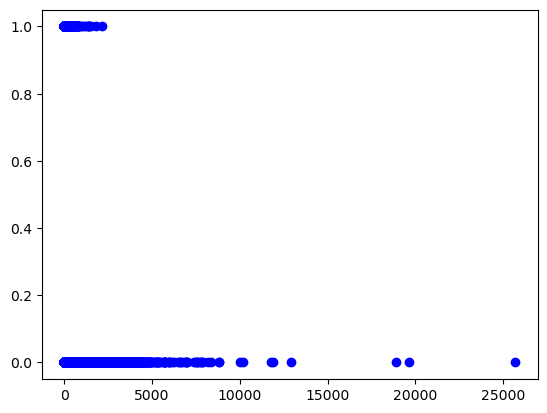

In [99]:
# Create scatter plot
plt.scatter(creditcard_df['Amount'], creditcard_df['Class'], c="blue")

# Show the plot
plt.show()

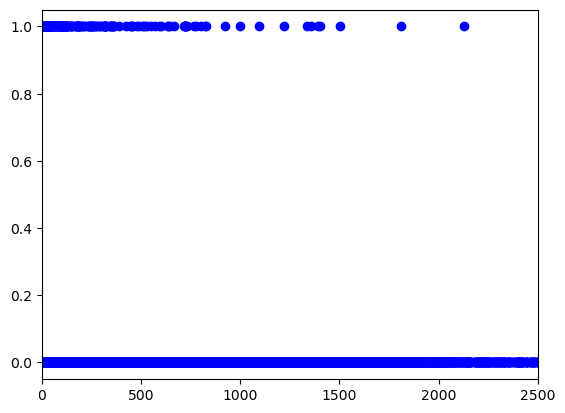

In [100]:
# Create scatter plot
plt.scatter(creditcard_df['Amount'], creditcard_df['Class'], c="blue")

plt.xlim(0,2500)

# Show the plot
plt.show()

Fruad transanction is below the amount of 2500

<Axes: >

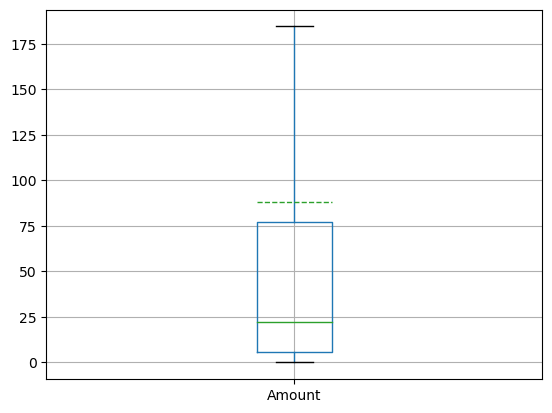

In [101]:
creditcard_df[['Amount']].boxplot(showfliers=False, meanline=True, showmeans=True)


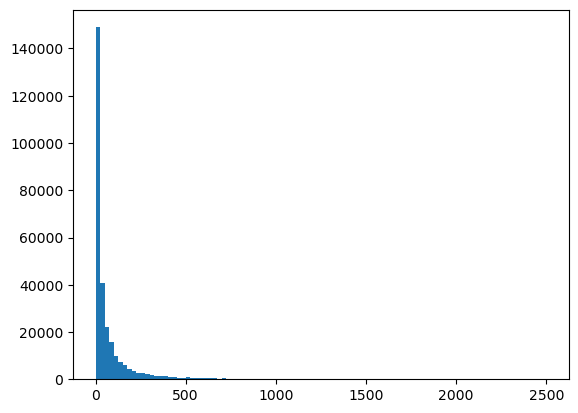

In [102]:
plt.hist(creditcard_df['Amount'], bins= 100, range = (0, 2500))
plt.show()

<Axes: >

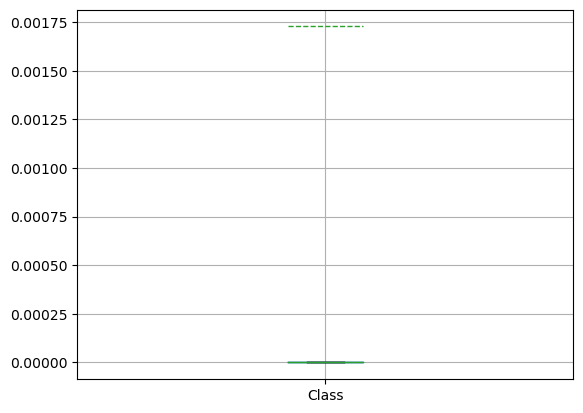

In [103]:
creditcard_df[['Class']].boxplot(showfliers=False, meanline=True, showmeans=True)

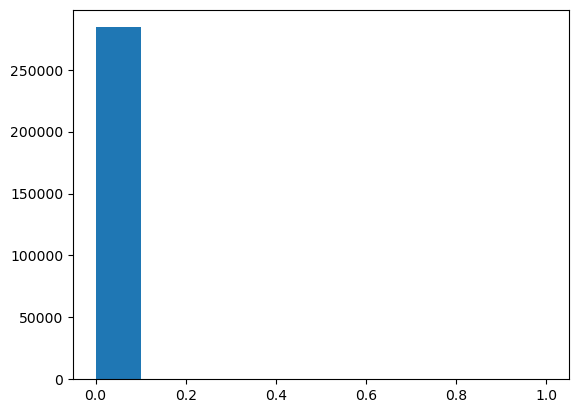

In [104]:
plt.hist(creditcard_df['Class'])
plt.show()

In [105]:
creditcard_df['Class'].sum(axis =0)

492

Hihgly imbalanced data 

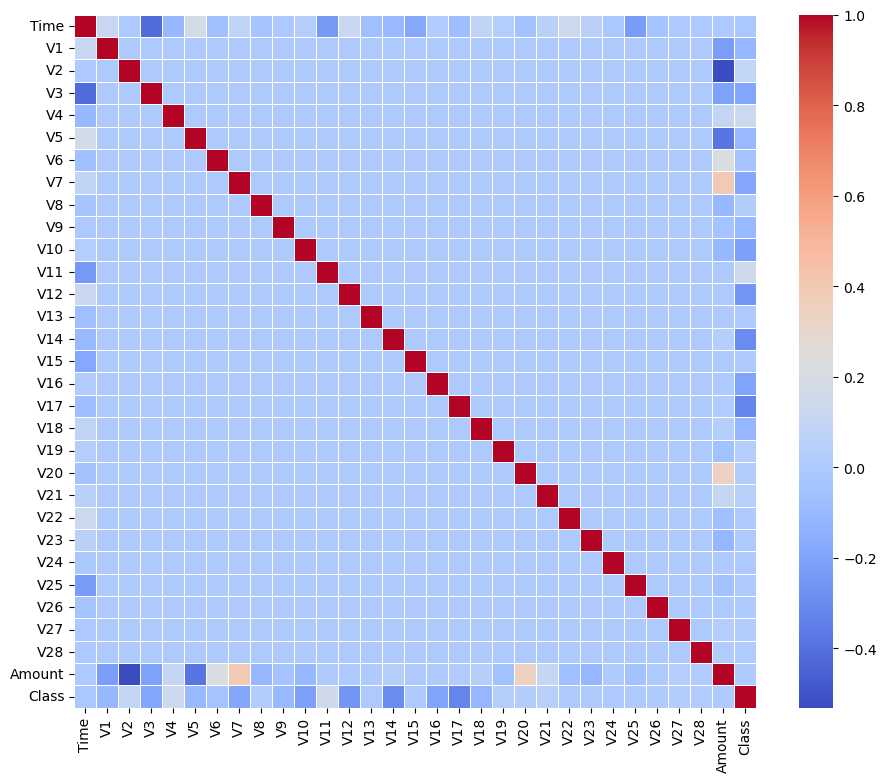

In [106]:
# Assuming 'df' is your DataFrame and it's already loaded with data.
# Calculate the correlation matrix
corr = creditcard_df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a heatmap
sns.heatmap(corr, annot=False, ax=ax, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show the plot
plt.show()

most of the columns are uncorrelated so we will use all of them for Supervised Machine Learning and for the purpose of feature Selection we are not merging the same columns

***Group by anaylsis***

*class*

We have grouped the data set into class and other variables as V1 , V2 ....., Amount

In [107]:
grouped_class_df = creditcard_df.groupby('Class')

In [108]:
grouped_class_df.describe()

Time                                                       \
          count          mean           std    min      25%      50%   
Class                                                                  
0      284315.0  94838.202258  47484.015786    0.0  54230.0  84711.0   
1         492.0  80746.806911  47835.365138  406.0  41241.5  75568.5   

                                 V1                                          \
            75%       max     count      mean       std       min       25%   
Class                                                                         
0      139333.0  172792.0  284315.0  0.008258  1.929814 -56.40751 -0.917544   
1      128483.0  170348.0     492.0 -4.771948  6.783687 -30.55238 -6.036063   

                                           V2                                 \
            50%       75%       max     count      mean       std        min   
Class                                                                          
0      0.020023  1.316218  2.454930  284315.0 -0.006271  1.636146 -72.715728   
1     -2.342497 -0.419200  2.132386     492.0  3.623778  4.291216  -8.402154   

                                                      V3                      \
            25%       50%       75%        max     count      mean       std   
Class                                                                          
0     -0.599473  0.064070  0.800446  18.902453  284315.0  0.012171  1.459429   
1      1.188226  2.717869  4.971257  22.057729     492.0 -7.033281  7.110937   

                                                                V4            \
             min       25%       50%       75%       max     count      mean   
Class                                                                          
0     -48.325589 -0.884541  0.182158  1.028372  9.382558  284315.0 -0.007860   
1     -31.103685 -8.643489 -5.075257 -2.276185  2.250210     492.0  4.542029   

                                                                          V5  \
            std       min       25%       50%       75%        max     count   
Class                                                                          
0      1.399333 -5.683171 -0.850077 -0.022405  0.737624  16.875344  284315.0   
1      2.873318 -1.313275  2.373050  4.177147  6.348729  12.114672     492.0   

                                                                     \
           mean       std         min       25%       50%       75%   
Class                                                                 
0      0.005453  1.356952 -113.743307 -0.689398 -0.053457  0.612181   
1     -3.151225  5.372468  -22.105532 -4.792835 -1.522962  0.214562   

                        V6                                                     \
             max     count      mean       std        min       25%       50%   
Class                                                                           
0      34.801666  284315.0  0.002419  1.329913 -26.160506 -0.766847 -0.273123   
1      11.095089     492.0 -1.397737  1.858124  -6.406267 -2.501511 -1.424616   

                                  V7                                           \
            75%        max     count      mean       std        min       25%   
Class                                                                           
0      0.399619  73.301626  284315.0  0.009637  1.178812 -31.764946 -0.551442   
1     -0.413216   6.474115     492.0 -5.568731  7.206773 -43.557242 -7.965295   

                                             V8                      \
            50%       75%         max     count      mean       std   
Class                                                                 
0      0.041138  0.571019  120.589494  284315.0 -0.000987  1.161283   
1     -3.034402 -0.945954    5.802537     492.0  0.570636  6.797831   

                                                                 V9            \
             min       25%       50%       75

In [109]:
grouped_class_df.size()

Class
0    284315
1       492
dtype: int64

In [110]:
grouped_class1_df = grouped_class_df.get_group(1)

In [111]:
grouped_class1_df.sample(3)

Time        V1        V2         V3        V4        V5        V6  \
88307   62080.0 -1.599457  2.607720  -2.987193  3.064156 -2.497914 -0.541103   
143335  85285.0 -6.713407  3.921104  -9.746678  5.148263 -5.151563 -2.099389   
150661  93853.0 -6.185857  7.102985 -13.030455  8.010823 -7.885237 -3.974550   

               V7        V8        V9        V10       V11        V12  \
88307   -2.277786  1.268166 -1.997331  -3.834775  1.113354  -4.976921   
143335  -5.937767  3.578780 -4.684952  -8.537758  6.348979  -8.681609   
150661 -12.229608  4.971232 -4.248307 -12.965481  8.688308 -17.182918   

             V13        V14       V15        V16        V17       V18  \
88307  -0.795531  -4.549557  1.813763  -3.177460  -5.369349 -1.121454   
143335  0.251179 -11.608002 -0.351569  -5.363566 -11.939092 -3.583603   
150661  0.069577 -14.116156  0.959032 -12.375334 -18.716765 -6.522015   

             V19       V20       V21       V22       V23       V24       V25  \
88307   2.030592  0.225333  0.662933  0.184087 -0.089452 -0.506000 -0.062259   
143335  0.897402  0.135711  0.954272 -0.451086  0.127214 -0.339450  0.394096   
150661  3.517955  0.483930  2.502772  0.481691  0.480958  0.360319 -0.293354   

             V26       V27       V28  Amount  Class  
88307  -0.052714  0.322854  0.135268  180.00      1  
143335  1.075295  1.649906 -0.394905  252.92      1  
150661 -0.199193 -0.203917  0.398927   44.90      1

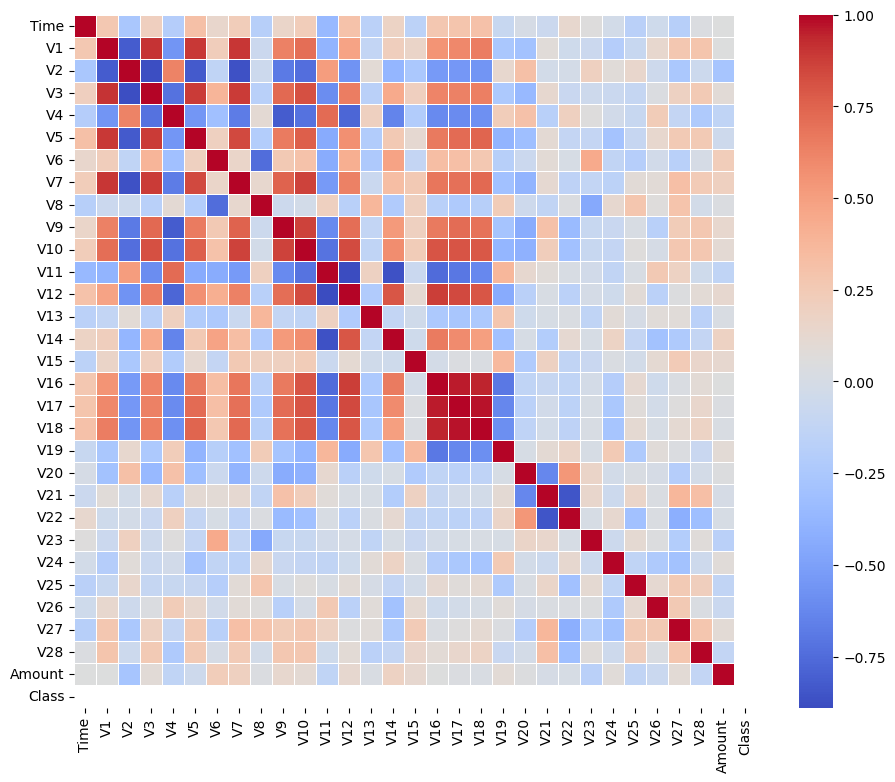

In [112]:
# Assuming 'df' is your DataFrame and it's already loaded with data.
# Calculate the correlation matrix
corr =grouped_class1_df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a heatmap
sns.heatmap(corr, annot=False, ax=ax, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show the plot
plt.show()

There are certain varibles for eg. V1 and V3 are highly correlated for fraudulent transaction

In [113]:
grouped_class0_df = grouped_class_df.get_group(0)

In [114]:
grouped_class0_df.sample(5)

Time        V1        V2        V3        V4        V5        V6  \
174731  122043.0  2.204618 -0.611498 -1.152938 -0.795733 -0.481962 -1.053141   
123946   77123.0  1.496680 -1.056941  0.310919 -1.508142 -1.390528 -0.526706   
66195    51930.0  1.234064  0.366703 -0.165512  1.069050  0.114523 -0.753310   
130666   79404.0 -0.695529 -0.137410  0.773704  1.512639  1.005173 -0.604163   
133689   80490.0  1.160366  0.037970  0.557385  0.518714 -0.484127 -0.355001   

              V7        V8        V9       V10       V11       V12       V13  \
174731 -0.291403 -0.351349 -0.512401  0.720048 -0.306832  0.203167  0.937302   
123946 -1.062144 -0.045084 -1.984781  1.628611  0.817121 -0.643426 -0.178254   
66195   0.390700 -0.147576 -0.097582  0.037519 -0.348401 -0.347955 -1.244723   
130666  0.038637 -0.055208 -0.002024  0.041021 -0.581515  0.697439  0.579518   
133689 -0.229549  0.162624  0.021896  0.108446  1.600324  0.317777 -1.503754   

             V14       V15       V16       V17       V18       V19       V20  \
174731 -0.322061 -0.592243  0.470074  0.505656 -2.123256  0.767396  0.008064   
123946 -0.001059 -0.037647 -0.078587  0.175881  0.640649  0.172549 -0.345468   
66195   0.835118  1.067786 -0.452389  0.035679 -0.669710 -0.603078 -0.266402   
130666 -0.131670 -0.112423 -1.068046  0.385095 -0.830757  0.345667 -0.257063   
133689  0.810299  0.752439  0.225863 -0.225315 -0.356725 -0.253065 -0.229931   

             V21       V22       V23       V24       V25       V26       V27  \
174731 -0.006867  0.069137  0.303769  1.174797 -0.069967 -0.388925 -0.028725   
123946 -0.190932 -0.225586 -0.011224 -0.024875  0.378802 -0.201861  0.021158   
66195   0.016196  0.081385 -0.100524  0.061606  0.738706 -0.262590  0.000684   
130666  0.045353  0.516006 -0.021632  0.142774 -0.971163 -0.452797  0.277328   
133689 -0.184544 -0.616960  0.199718  0.172904  0.030826  0.099903 -0.026926   

             V28  Amount  Class  
174731 -0.048816    6.00      0  
123946  0.006428   15.00      0  
66195   0.004823    1.00      0  
130666  0.106094   50.23      0  
133689  0.003737    0.89      0

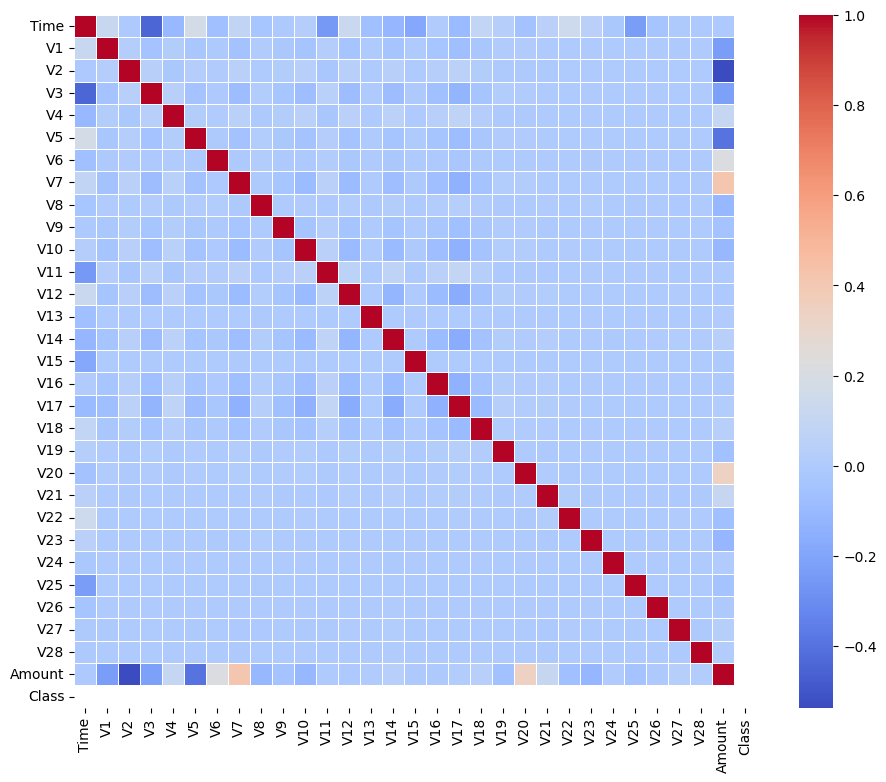

In [115]:
# Assuming 'df' is your DataFrame and it's already loaded with data.
# Calculate the correlation matrix
corr =grouped_class0_df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a heatmap
sns.heatmap(corr, annot=False, ax=ax, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show the plot
plt.show()

For the observation purpose we can observe that in case of both fraudulent and non fraudulent transactions the variables from V1 to V17 are correlated 

*Amount*

Again we have grouped the dataset into amount and other variables like V1, V2 .... and amount which is additional work in our analysis

After grouping pair plotting has been performed to have better visualisation of the data

In [116]:
creditcard_df['Amount_Group'] = creditcard_df['Amount'].apply(categorize_amount)

In [117]:
creditcard_df.sample(5)

Time        V1        V2        V3        V4        V5        V6  \
189867  128592.0  2.016682  0.161683 -2.510807  0.781926  0.636618 -0.894135   
216539  140522.0  2.065634  0.124820 -1.670474  0.447086  0.322970 -0.950876   
142255   84623.0  1.222715 -0.377554  0.567250 -1.106864 -0.428327  0.496259   
273183  165465.0 -0.413047  1.056426 -0.266513 -1.252337  1.303242  0.045532   
144768   86384.0 -3.863477  3.163942 -0.225369 -2.072114 -0.751475 -0.582309   

              V7        V8        V9       V10       V11       V12       V13  \
189867  0.129671 -0.157019  0.906772 -1.040691 -0.792875 -0.879318 -1.357590   
216539  0.157665 -0.217179  0.556781 -0.365184 -0.554440 -0.065046 -0.415560   
142255 -0.684524  0.234836  1.422465 -0.991631  0.926454  1.913692  1.293152   
273183  1.164951 -0.317264  0.748013  1.123927 -0.259993 -0.070469 -0.478550   
144768  0.122865  0.513454  1.808327  2.948716  1.456904  0.655698 -0.649375   

             V14       V15       V16       V17       V18       V19       V20  \
189867 -2.431751 -0.195200  0.510938  1.970385  0.906342 -0.143557 -0.142871   
216539 -0.746073  0.248487  0.308162  0.537367 -0.284435  0.016873 -0.187008   
142255 -0.231922  0.745744 -0.346358 -0.505601  0.358794  0.804844 -0.035903   
273183 -0.278801 -0.784161  0.244345 -1.303212  0.074372  0.575769  0.490076   
144768 -0.200115  0.140858  0.211126 -0.517233 -0.473240 -1.012506  1.090677   

             V21       V22       V23       V24       V25       V26       V27  \
189867 -0.045001  0.063289 -0.051460  0.302758  0.217511  0.711082 -0.053601   
216539 -0.362599 -0.964009  0.357270  0.626045 -0.287831  0.166715 -0.065757   
142255  0.024843  0.387084 -0.141093 -0.787446  0.556375 -0.624949  0.113592   
273183 -0.496440 -0.751881 -0.154642 -1.478903 -0.270909  0.170411  0.232365   
144768 -0.114405 -0.149624  0.128246 -0.002328  0.058822  0.745713  0.354949   

             V28  Amount  Class Amount_Group  
189867 -0.006959   29.56      0       0-2500  
216539 -0.030238    2.69      0       0-2500  
142255  0.015688    1.00      0       0-2500  
273183 -0.187008    1.79      0       0-2500  
144768  0.698798    7.68      0       0-2500

In [118]:
grouped_amount_df = creditcard_df.groupby('Amount_Group')

In [119]:
grouped_amount_df.size()

Amount_Group
0-2500        284367
2500-above       440
dtype: int64

In [120]:
grouped_amountlow_df = grouped_amount_df.get_group('0-2500') 

In [121]:
col = grouped_amountlow_df.columns

In [122]:
col

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'Amount_Group'],
      dtype='object')

In [123]:
col1 = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class']

In [124]:
col2 = ['V1', 'V2', 'V3', 'V15','Amount',
       'Class']

In [125]:
col5 = ['V4', 'V5', 'V7', 'V8','V13','V16','V18', 'Amount',
       'Class']

col6 = ['V21', 'V22', 'V24', 'V25','V26','V23', 'Amount',
       'Class']

col4 = ['V11', 'V14', 'V28', 'V17','V6','V9','V6','Amount',
       'Class']

col2 = ['V1', 'V2', 'V3', 'V15','Amount',
       'Class']

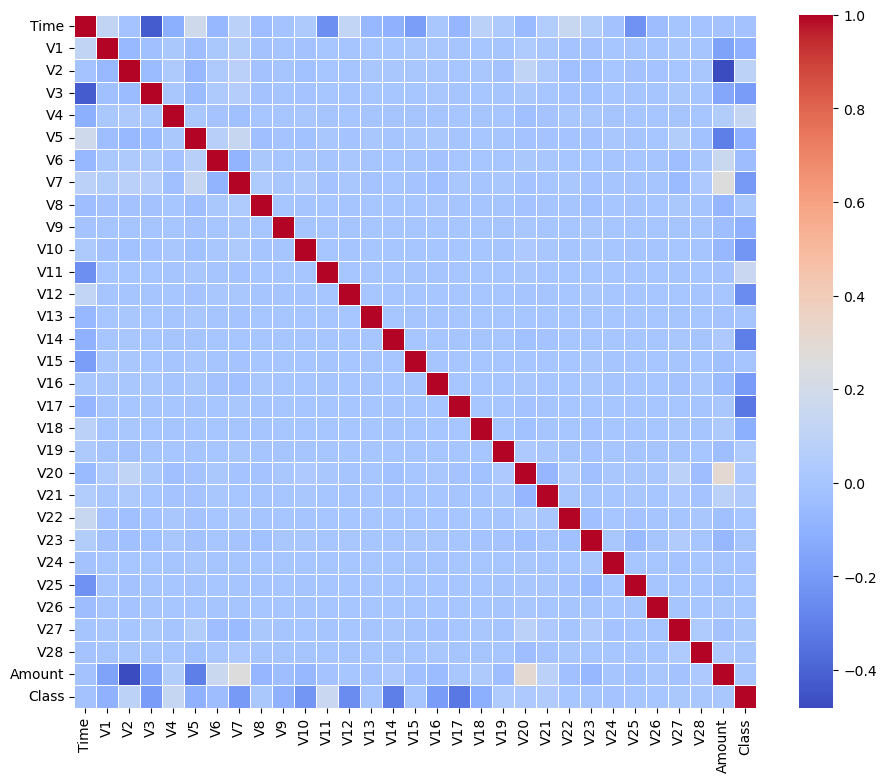

In [126]:
# Assuming 'df' is your DataFrame and it's already loaded with data.
# Calculate the correlation matrix
corr =grouped_amountlow_df[col1].corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a heatmap
sns.heatmap(corr, annot=False, ax=ax, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show the plot
plt.show()

c:\Users\Soumi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


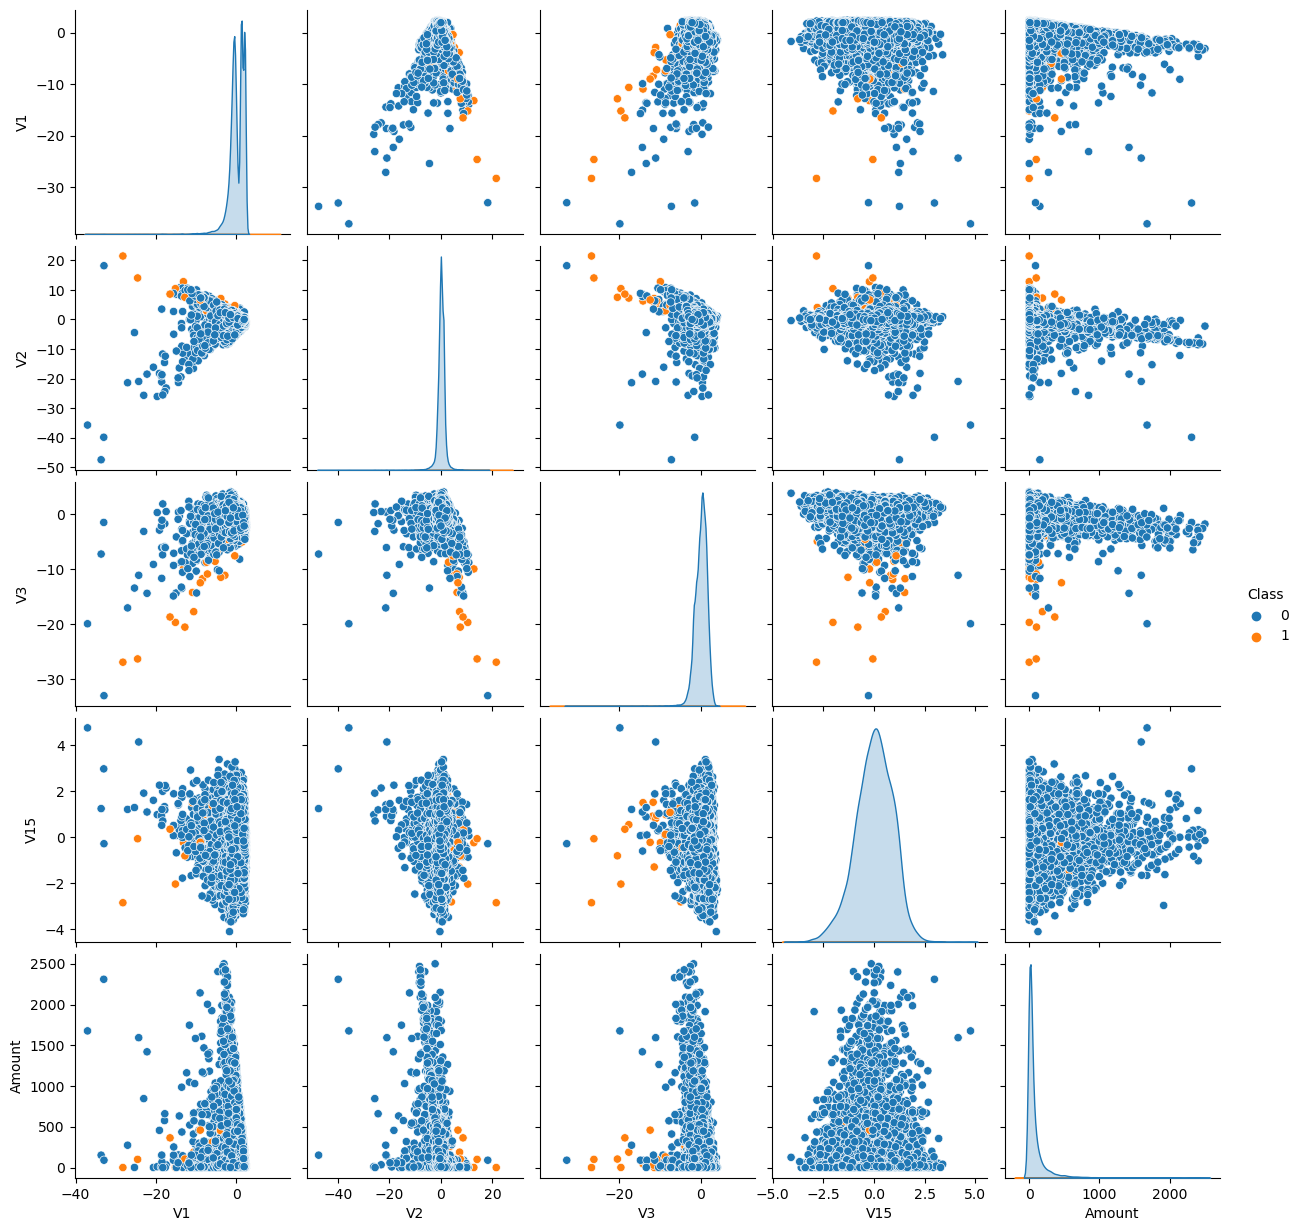

In [127]:
sns.pairplot(grouped_amountlow_df[col2].sample(frac = 0.1), hue = 'Class')
plt.show()

c:\Users\Soumi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


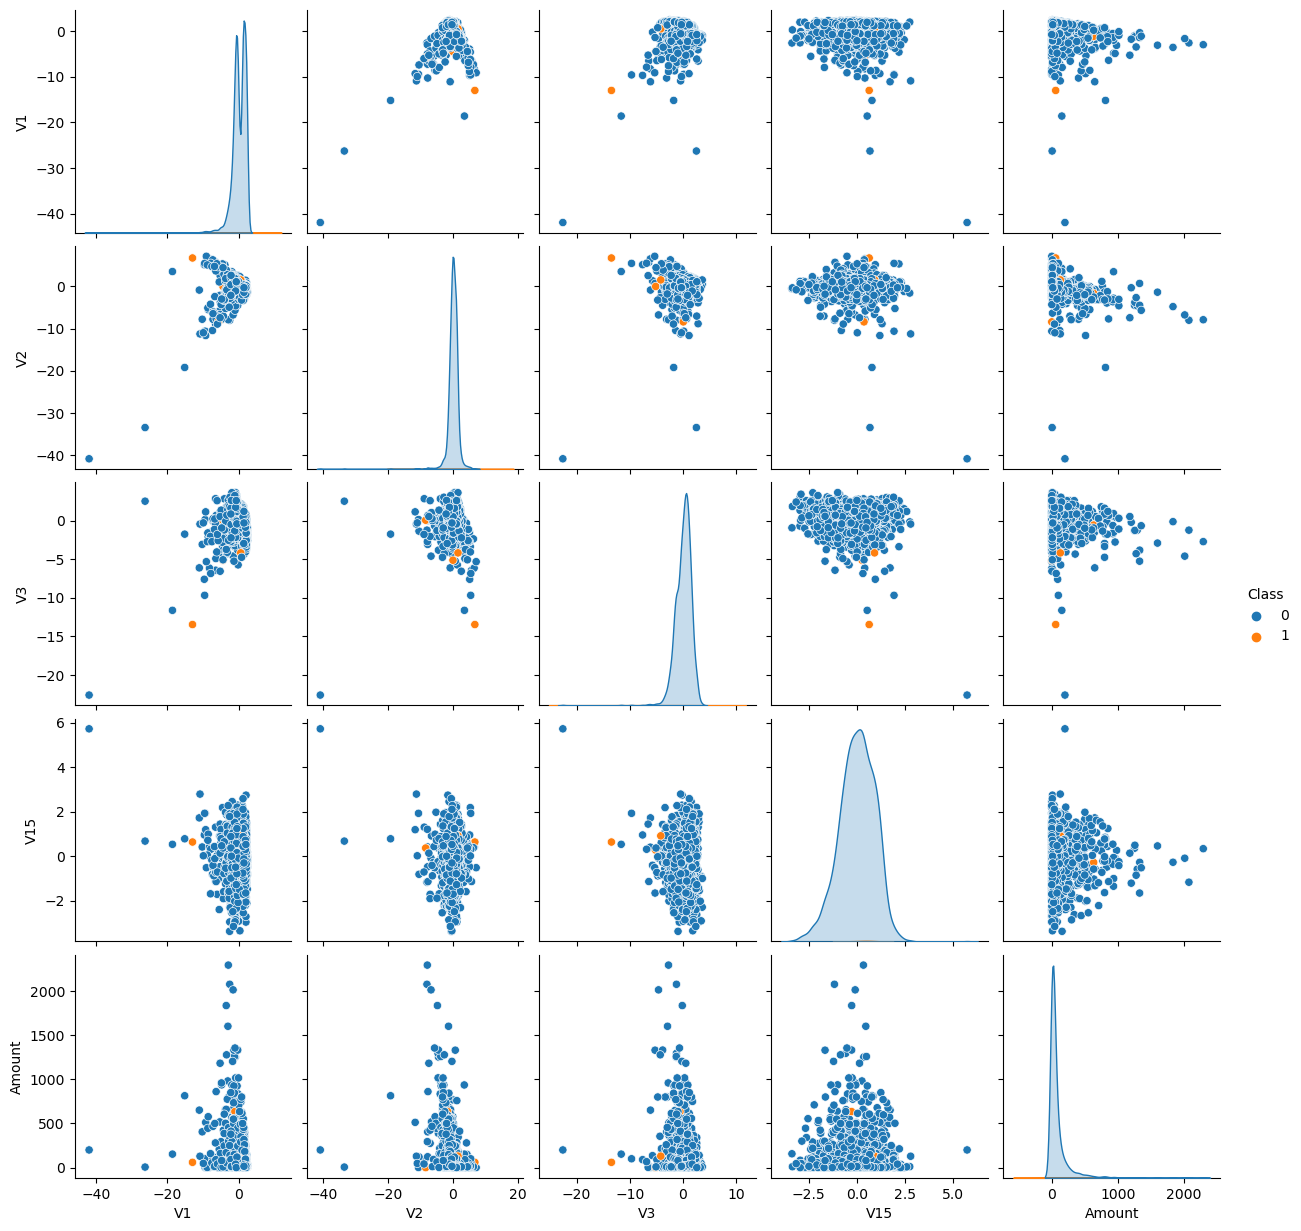

In [128]:
sns.pairplot(grouped_amountlow_df[col2].sample(frac = 0.01), hue = 'Class')
plt.show()

In [129]:
col3 = ['V10', 'V12', 'V20', 'V27','Amount',
       'Class']


c:\Users\Soumi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


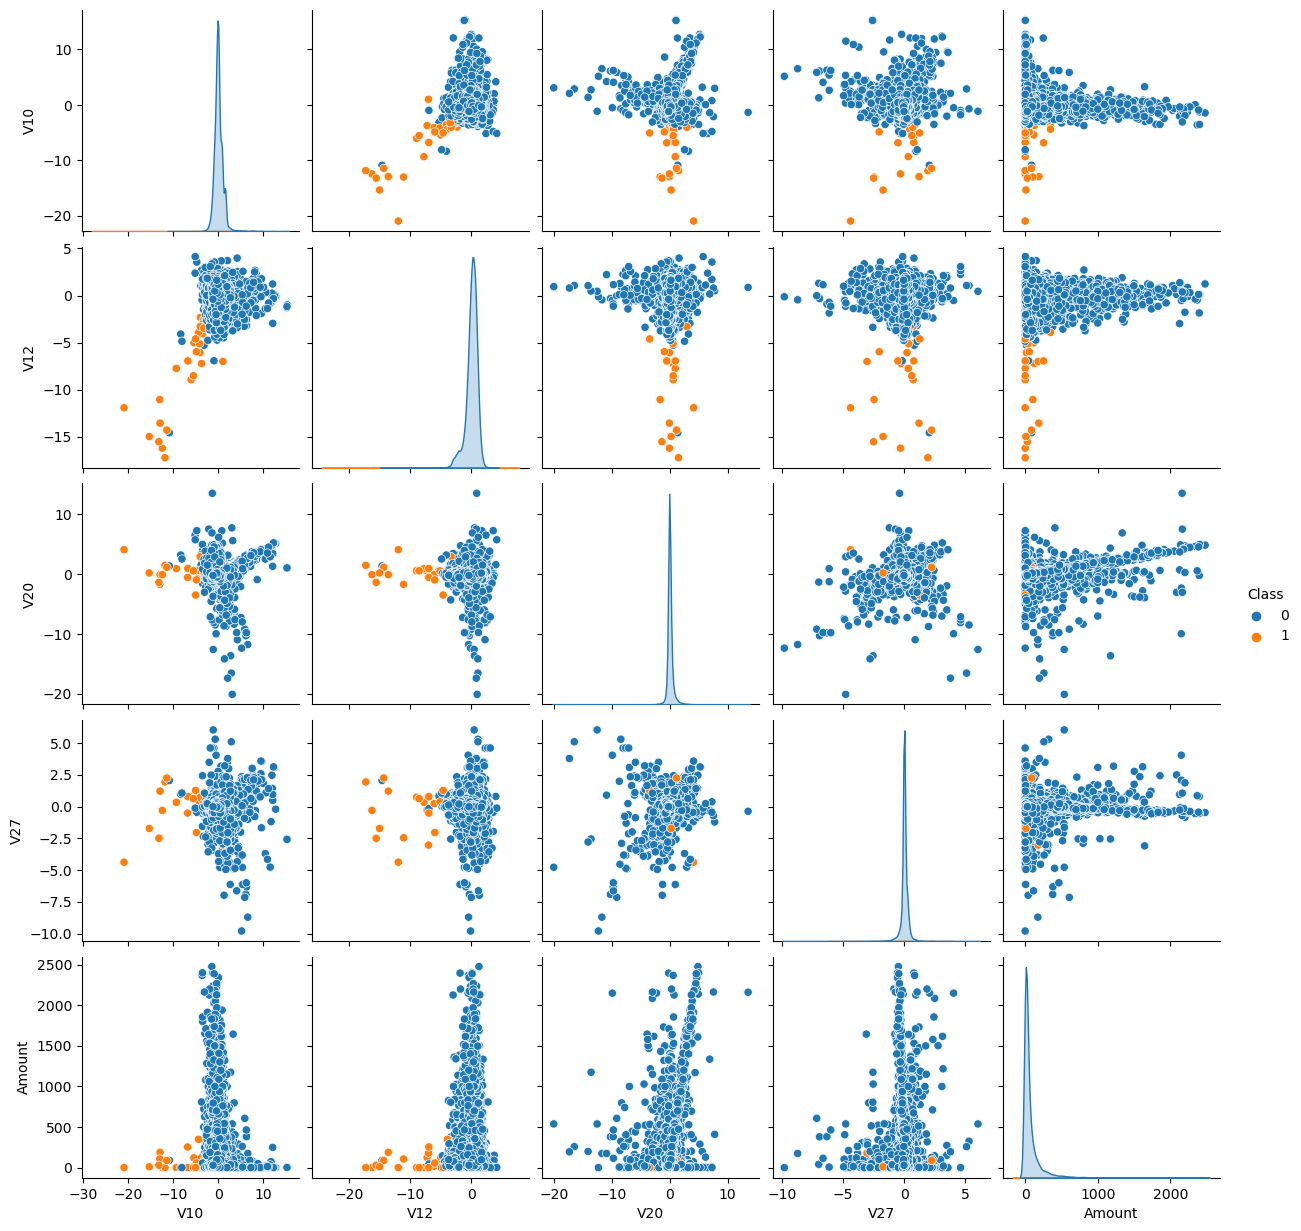

In [130]:
sns.pairplot(grouped_amountlow_df[col3].sample(frac = 0.1), hue = 'Class')
plt.show()

In [131]:
col4 = ['V11', 'V14', 'V28', 'V17','V6','V9','V6','Amount',
       'Class']


In [132]:
#sns.pairplot(grouped_amountlow_df[col4].sample(frac = 0.1), hue = 'Class')
#plt.show()

c:\Users\Soumi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


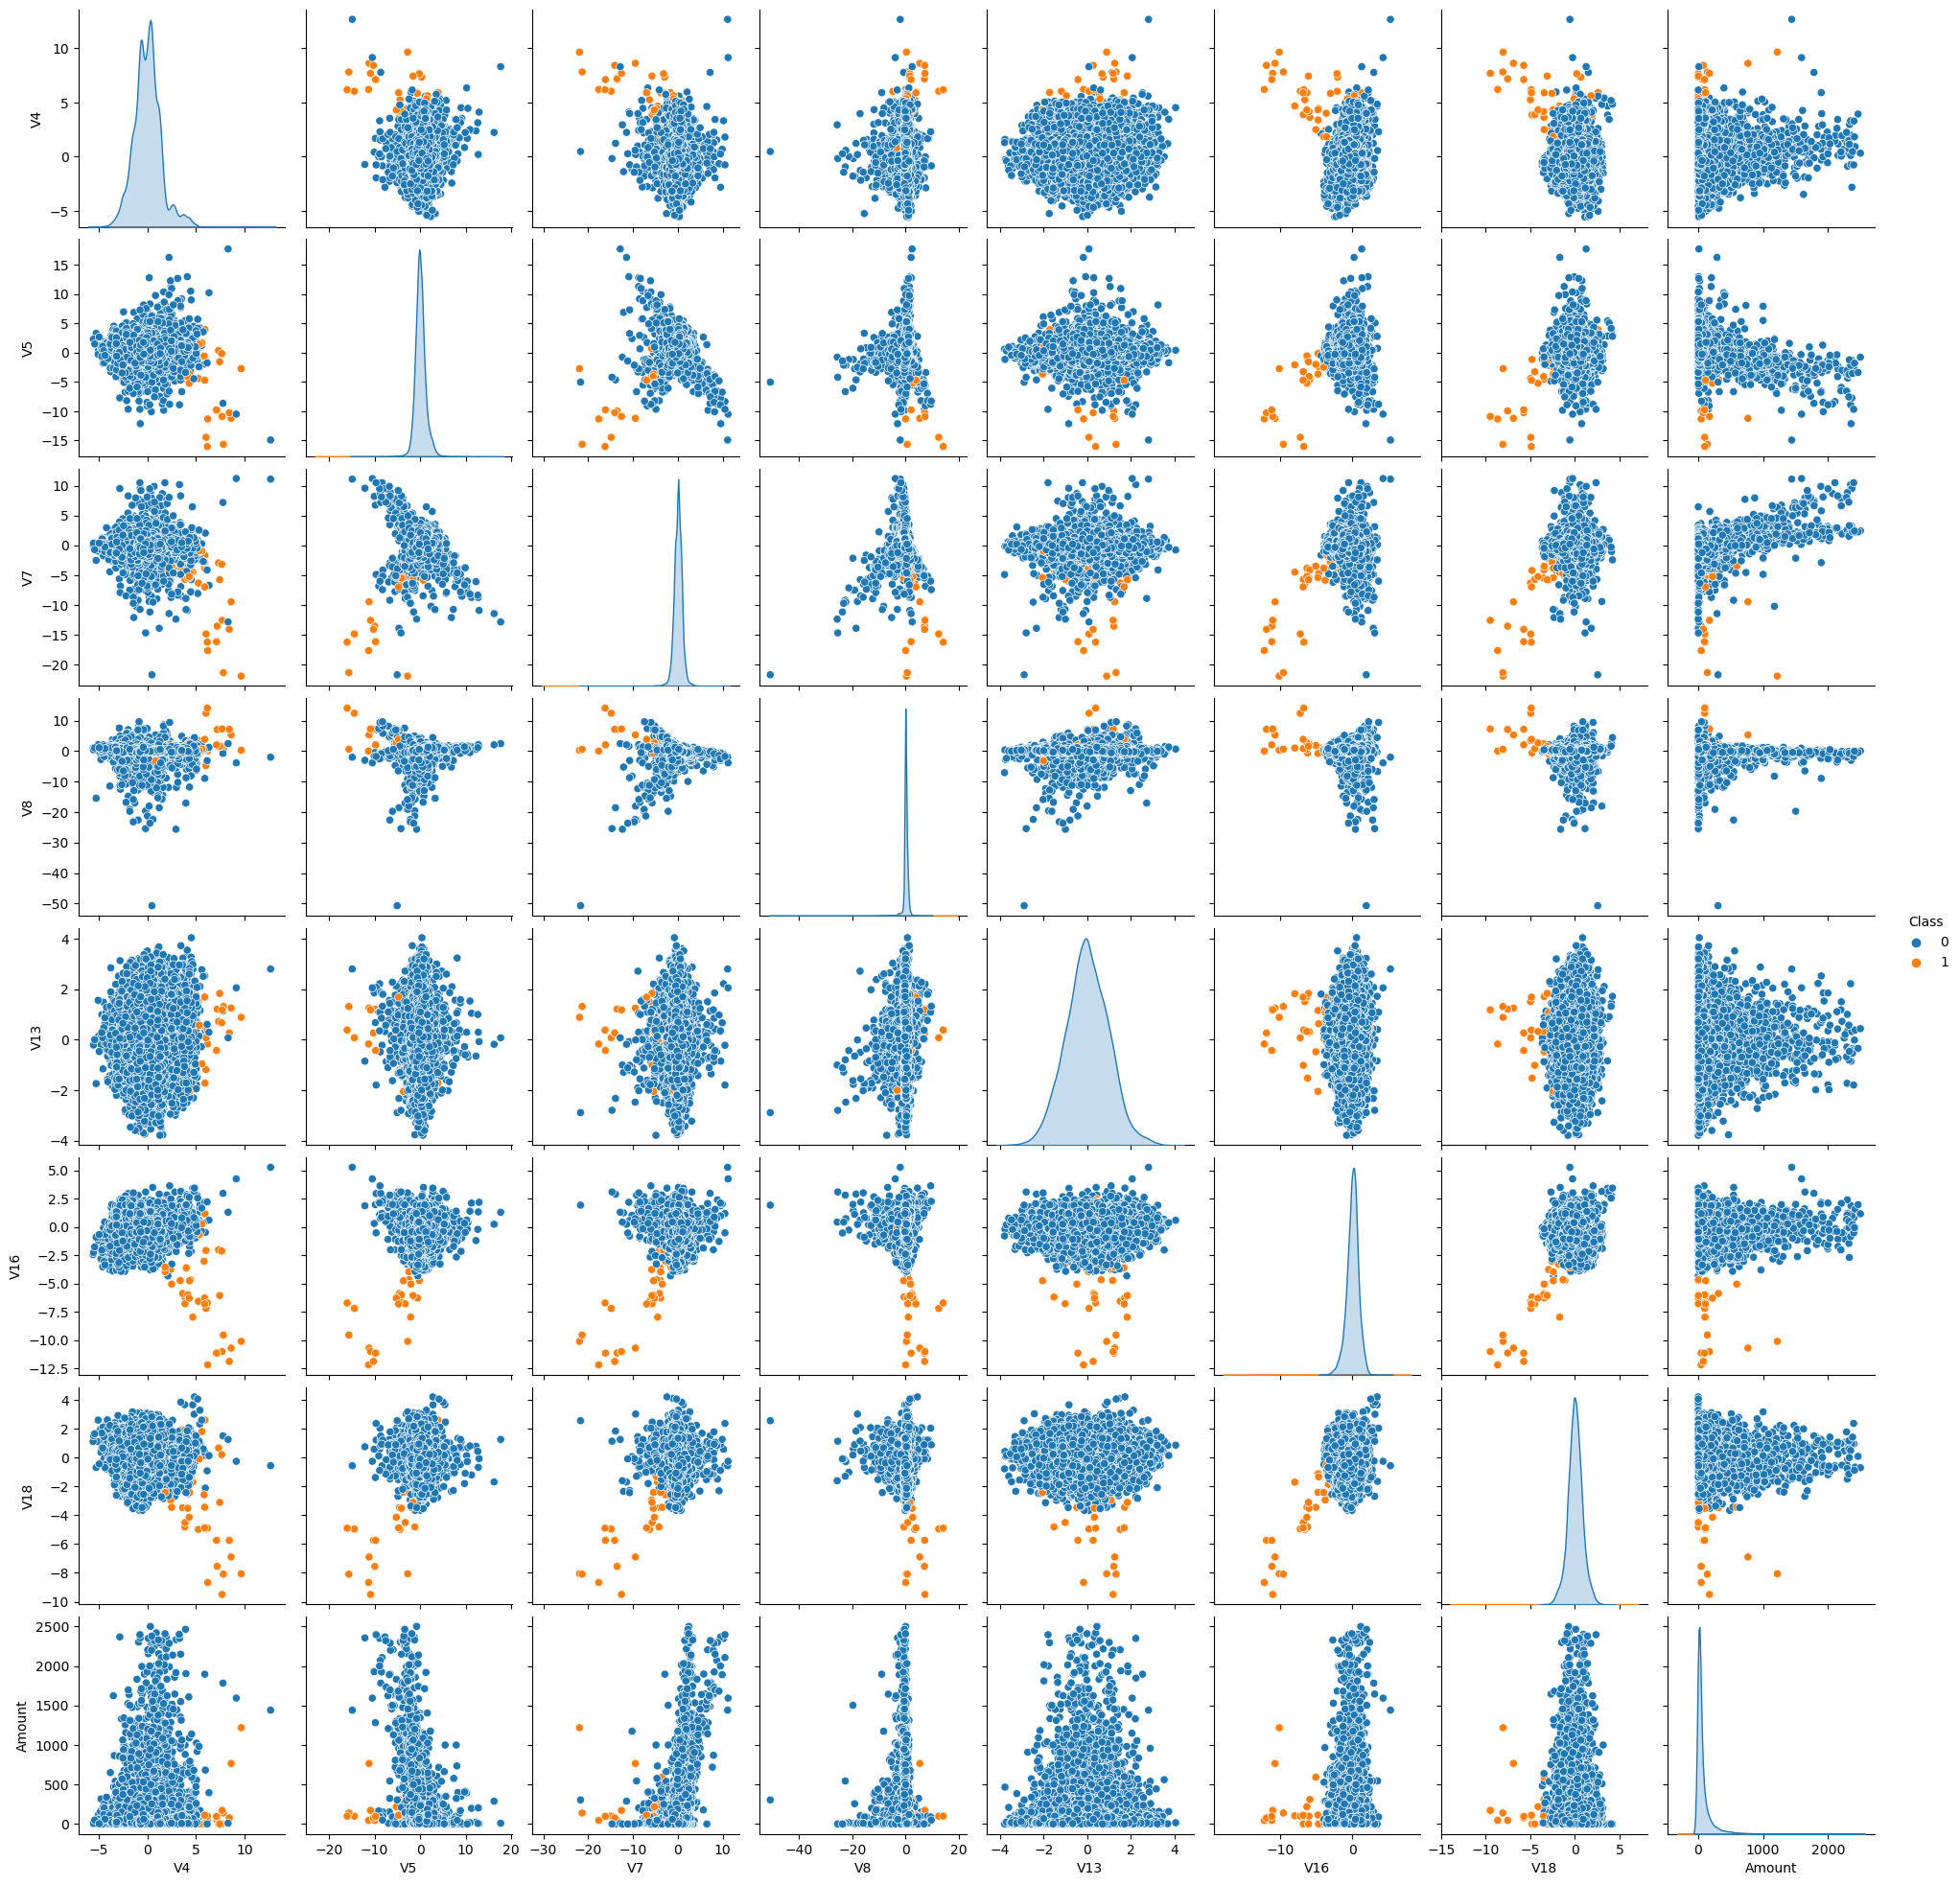

In [133]:
sns.pairplot(grouped_amountlow_df[col5].sample(frac = 0.1), hue = 'Class')
plt.show()

c:\Users\Soumi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


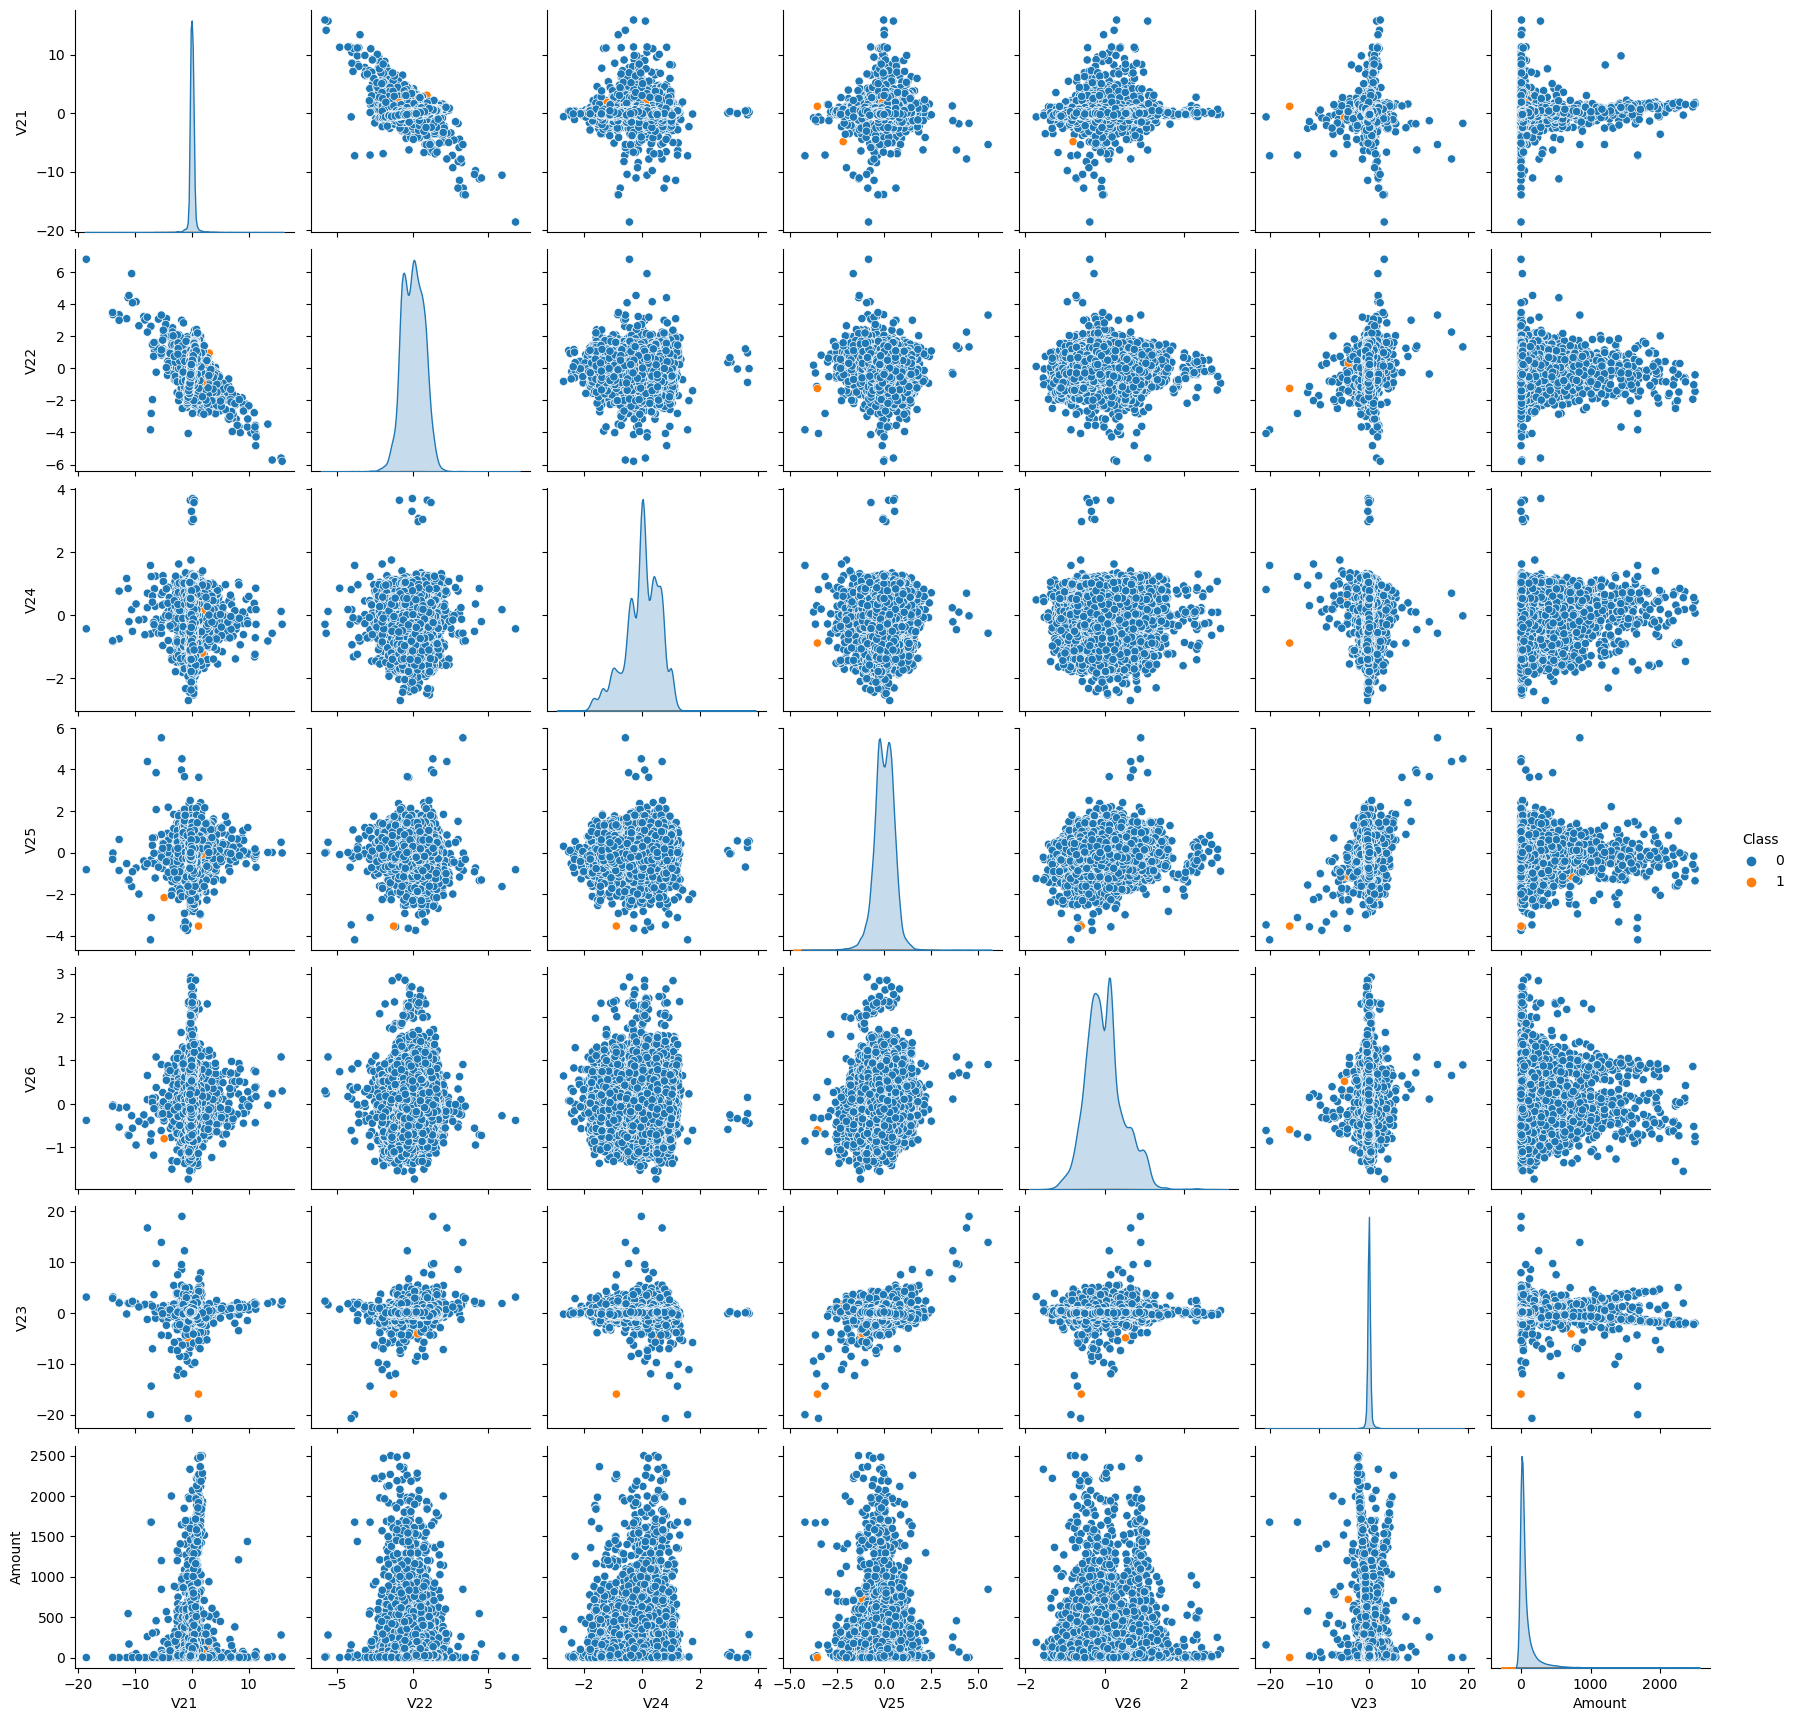

In [134]:
sns.pairplot(grouped_amountlow_df[col6].sample(frac = 0.1), hue = 'Class')
plt.show()

 #after pairs plotting we can identify there are some outliers which are fraud

In [135]:
col5 = ['V4', 'V5', 'V7', 'V8','V13','V16','V18', 'Amount',
       'Class']

col6 = ['V21', 'V22', 'V24', 'V25','V26','V23', 'Amount',
       'Class']

col4 = ['V11', 'V14', 'V28', 'V17','V6','V9','V6','Amount',
       'Class']

col2 = ['V1', 'V2', 'V3', 'V15','Amount',
       'Class']

*two group*

In [136]:
grouped_amount_class_df = creditcard_df.groupby(['Amount_Group', 'Class'])

In [137]:
grouped_amount_class_df.size()

Amount_Group  Class
0-2500        0        283875
              1           492
2500-above    0           440
dtype: int64

In [138]:
grouped_amount_class_df.sample(3)

Time         V1         V2         V3        V4         V5  \
20683    31206.0  -0.938755   1.231259   0.973737  0.493606   0.439271   
138603   82752.0  -0.645393  -0.719903   1.903500 -2.314169  -1.171144   
1818      1410.0  -1.279127   1.273667   1.308744 -0.836249  -0.378374   
74496    55614.0  -7.347955   2.397041  -7.572356  5.177819  -2.854838   
41943    40892.0  -2.140511   4.104871  -8.996859  4.028391  -5.131359   
14170    25198.0 -15.903635  10.393917 -19.133602  6.185969 -12.538021   
219182  141633.0  -7.319170 -15.099711  -4.782758  7.323680  -4.493311   
227636  145150.0  -7.500595 -16.479379  -6.313022  2.752378  -5.516627   
201638  133971.0 -10.950173 -13.359133 -10.664755  1.157565 -28.363785   

               V6         V7         V8        V9        V10       V11  \
20683    0.264029   0.872224  -0.140827 -0.168371   0.958256  1.184672   
138603  -0.904602  -0.524784  -0.111908 -1.987149   0.881927 -0.737666   
1818    -0.768231   0.553704   0.195372  0.525151   0.470490  0.968734   
74496   -1.795239  -8.783235   0.437157 -3.740598  -8.332863  5.763189   
41943   -4.153568  -9.360095   1.922075 -4.026180 -13.691315  9.095288   
14170   -4.027030 -13.897827  10.662252 -2.844954  -9.668789  7.394419   
219182   4.243609   4.836252  -0.337842 -0.327881  -0.937288 -1.197473   
227636   1.201422   5.912656  -1.347216  1.299832  -2.996920 -0.620369   
201638  17.019934  30.897666  -4.699193 -2.450505  -5.854899 -0.660502   

              V12       V13        V14       V15        V16        V17  \
20683    0.220187 -0.476931   0.206820  0.723714  -0.435001  -0.398857   
138603  -1.177107  0.390433  -0.653178  0.228715   0.102421   0.079951   
1818     0.088958 -1.779626   0.191198 -0.803593   0.136643  -0.407379   
74496   -8.707879 -1.716949  -9.577194  0.146369  -7.586491 -12.503931   
41943  -14.168121 -0.140455 -17.620634  1.482740 -13.256833 -21.675484   
14170  -11.635630  1.423277  -8.640459 -0.674720  -7.695569 -13.684140   
219182  -0.564470 -0.081586   0.851950  1.535908   1.618025  -0.293037   
227636   0.776024  1.200749   1.060894  2.096443   0.601781  -0.341451   
201638  -4.023513 -0.154341  -0.969794  0.653798   4.448977  -1.044700   

             V18       V19       V20       V21       V22       V23       V24  \
20683   0.239530  0.447998  0.177728  0.103583  0.629680 -0.162759 -0.307316   
138603  0.250347 -0.917742 -0.447018 -0.137153 -0.068640 -0.017375  0.342854   
1818   -0.018056 -0.091258  0.305850 -0.235408 -0.415838 -0.016208  0.500206   
74496  -4.375631  2.465195  0.073164 -0.175273  0.543325 -0.547955 -0.503722   
41943  -7.823469  2.995111  1.725578  1.854267 -0.165534 -0.339939  0.296314   
14170  -4.777406  1.268343  1.501565  1.577548 -1.280137 -0.601295  0.040404   
219182  0.314995 -4.395283  9.154664  3.101612 -1.625029 -3.775319 -0.392619   
227636  1.202426 -1.308951  9.946415  3.192842 -1.864286 -4.194015  0.918576   
201638 -0.325435 -0.090950  0.966506 -1.023572 -0.331756  9.616935  0.504795   

             V25       V26       V27       V28   Amount  Class Amount_Group  
20683  -0.265039 -0.342023 -0.015627  0.061466    34.38      0       0-2500  
138603 -0.523901 -0.511046  0.106854  0.111619    63.00      0       0-2500  
1818   -0.170307  0.281936  0.604926  0.352470     5.00      0       0-2500  
74496  -0.310933 -0.163986  1.197895  0.378187     0.83      1       0-2500  
41943   1.364225 -0.518996  2.352333  1.130625     0.76      1       0-2500  
14170   0.995502 -0.273743  1.688136  0.527831    99.99      1       0-2500  
219182 -2.408094 -0.445515 -0.800692  0.789495  4692.65      0   2500-above  
227636 -2.007090 -0.331943 -0.935932  0.821083  4959.85      0   2500-above  
201638  2.681358 -0.263591  3.414929 -2.455350  7583.32      0   2500-above

In [139]:
grouped_amountlow_class1_df = grouped_amount_class_df.get_group(('0-2500', 1))

In [140]:
grouped_amountlow_class1_df.describe()

Time          V1          V2          V3          V4  \
count     492.000000  492.000000  492.000000  492.000000  492.000000   
mean    80746.806911   -4.771948    3.623778   -7.033281    4.542029   
std     47835.365138    6.783687    4.291216    7.110937    2.873318   
min       406.000000  -30.552380   -8.402154  -31.103685   -1.313275   
25%     41241.500000   -6.036063    1.188226   -8.643489    2.373050   
50%     75568.500000   -2.342497    2.717869   -5.075257    4.177147   
75%    128483.000000   -0.419200    4.971257   -2.276185    6.348729   
max    170348.000000    2.132386   22.057729    2.250210   12.114672   

               V5          V6          V7          V8          V9         V10  \
count  492.000000  492.000000  492.000000  492.000000  492.000000  492.000000   
mean    -3.151225   -1.397737   -5.568731    0.570636   -2.581123   -5.676883   
std      5.372468    1.858124    7.206773    6.797831    2.500896    4.897341   
min    -22.105532   -6.406267  -43.557242  -41.044261  -13.434066  -24.588262   
25%     -4.792835   -2.501511   -7.965295   -0.195336   -3.872383   -7.756698   
50%     -1.522962   -1.424616   -3.034402    0.621508   -2.208768   -4.578825   
75%      0.214562   -0.413216   -0.945954    1.764879   -0.787850   -2.614184   
max     11.095089    6.474115    5.802537   20.007208    3.353525    4.031435   

              V11         V12         V13         V14         V15         V16  \
count  492.000000  492.000000  492.000000  492.000000  492.000000  492.000000   
mean     3.800173   -6.259393   -0.109334   -6.971723   -0.092929   -4.139946   
std      2.678605    4.654458    1.104518    4.278940    1.049915    3.865035   
min     -1.702228  -18.683715   -3.127795  -19.214325   -4.498945  -14.129855   
25%      1.973397   -8.688177   -0.979117   -9.692723   -0.643539   -6.562915   
50%      3.586218   -5.502530   -0.065566   -6.729720   -0.057227   -3.549795   
75%      5.307078   -2.974088    0.672964   -4.282821    0.609189   -1.226043   
max     12.018913    1.375941    2.815440    3.442422    2.471358    3.139656   

              V17         V18         V19         V20         V21         V22  \
count  492.000000  492.000000  492.000000  492.000000  492.000000  492.000000   
mean    -6.665836   -2.246308    0.680659    0.372319    0.713588    0.014049   
std      6.970618    2.899366    1.539853    1.346635    3.869304    1.494602   
min    -25.162799   -9.498746   -3.681904   -4.128186  -22.797604   -8.887017   
25%    -11.945057   -4.664576   -0.299423   -0.171760    0.041787   -0.533764   
50%     -5.302949   -1.664346    0.646807    0.284693    0.592146    0.048434   
75%     -1.341940    0.091772    1.649318    0.822445    1.244611    0.617474   
max      6.739384    3.790316    5.228342   11.059004   27.202839    8.361985   

              V23         V24         V25         V26         V27         V28  \
count  492.000000  492.000000  492.000000  492.000000  492.000000  492.000000   
mean    -0.040308   -0.105130    0.041449    0.051648    0.170575    0.075667   
std      1.579642    0.515577    0.797205    0.471679    1.376766    0.547291   
min    -19.254328   -2.028024   -4.781606   -1.152671   -7.263482   -1.869290   
25%     -0.342175   -0.436809   -0.314348   -0.259416   -0.020025   -0.108868   
50%     -0.073135   -0.060795    0.088371    0.004321    0.394926    0.146344   
75%      0.308378    0.285328    0.456515    0.396733    0.826029    0.381152   
max      5.466230    1.091435    2.208209    2.745261    3.052358    1.779364   

            Amount  Class  
count   492.000000  492.0  
mean    122.211321    1.0  
std     256.683288    0.0  
min       0.000000    1.0  
25%       1.000000    1.0  
50%       9.250000    1.0  
75%     105.890000    1.0  
max    2125.870000    1.0

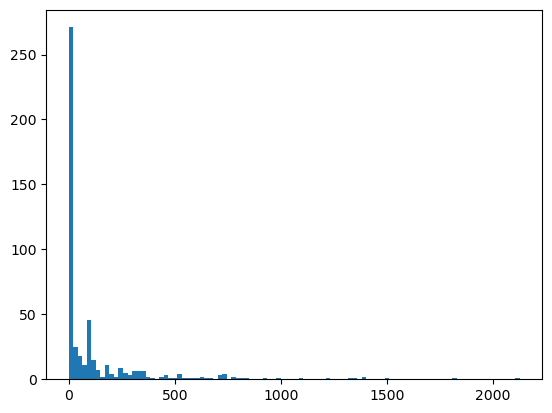

In [141]:
plt.hist(grouped_amountlow_class1_df['Amount'], bins=100)
plt.show()

We can observe that fruad transaction via credit cards occurs at very low range of amount around 100 dollars

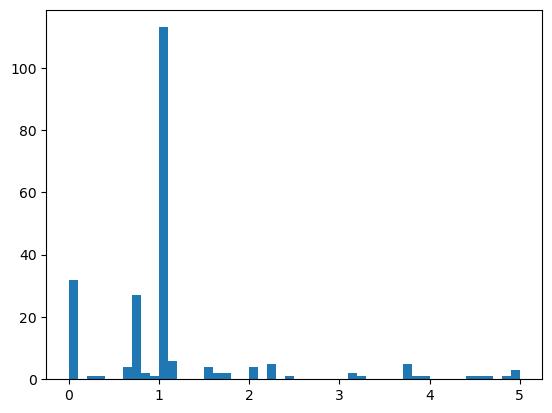

In [142]:
plt.hist(grouped_amountlow_class1_df['Amount'], range=(0,5), bins=50)
plt.show()

For fruadlent transaction mode of amount =1 dollar

In [143]:
grouped_amountlow_class0_df = grouped_amount_class_df.get_group(('0-2500', 0))

In [144]:
grouped_amountlow_class0_df.describe()

Time             V1             V2             V3  \
count  283875.000000  283875.000000  283875.000000  283875.000000   
mean    94842.693002       0.019252       0.011278       0.020141   
std     47486.591102       1.896891       1.543058       1.438756   
min         0.000000     -56.407510     -72.715728     -33.680984   
25%     54237.500000      -0.913512      -0.595753      -0.878702   
50%     84715.000000       0.023871       0.065687       0.184441   
75%    139340.000000       1.316972       0.801707       1.029929   
max    172792.000000       2.454930      18.902453       9.382558   

                  V4             V5             V6             V7  \
count  283875.000000  283875.000000  283875.000000  283875.000000   
mean       -0.012053       0.017056      -0.003995      -0.003225   
std         1.392545       1.279867       1.299465       1.076977   
min        -5.683171     -23.669726     -26.160506     -31.764946   
25%        -0.851194      -0.686058      -0.767394      -0.552336   
50%        -0.024309      -0.052033      -0.274552       0.039884   
75%         0.733815       0.613252       0.395629       0.568357   
max        16.491217      34.801666      16.614054      21.014587   

                  V8             V9            V10            V11  \
count  283875.000000  283875.000000  283875.000000  283875.000000   
mean        0.002065       0.005339       0.012705      -0.006953   
std         1.153434       1.088449       1.040267       1.002772   
min       -73.216718      -6.290730     -14.741096      -4.797473   
25%        -0.207385      -0.639440      -0.530921      -0.763604   
50%         0.022636      -0.049409      -0.090828      -0.035154   
75%         0.326947       0.598685       0.456700       0.735867   
max        18.709255      15.594995      23.745136      10.002190   

                 V12            V13            V14            V15  \
count  283875.000000  283875.000000  283875.000000  283875.000000   
mean        0.011214      -0.000310       0.011228      -0.000451   
std         0.945446       0.994830       0.896178       0.914423   
min       -15.144988      -5.791881     -18.392091      -4.391307   
25%        -0.401400      -0.648514      -0.422857      -0.583170   
50%         0.141938      -0.013859       0.051350       0.047831   
75%         0.619288       0.661984       0.492874       0.648318   
max         7.848392       4.569009      10.526766       5.825654   

                 V16            V17            V18            V19  \
count  283875.000000  283875.000000  283875.000000  283875.000000   
mean        0.006018       0.011570       0.003407       0.000122   
std         0.842411       0.749273       0.823714       0.810010   
min       -10.115560     -17.098444      -5.366660      -4.932733   
25%        -0.465782      -0.482640      -0.497319      -0.454861   
50%         0.066979      -0.064971      -0.002997       0.003967   
75%         0.522904       0.399787       0.500424       0.457997   
max         6.442798       9.253526       4.295648       5.591971   

                 V20            V21            V22            V23  \
count  283875.000000  283875.000000  283875.000000  283875.000000   
mean       -0.007283      -0.003176       0.001888       0.002227   
std         0.684865       0.707172       0.719780       0.555094   
min       -23.646890     -34.830382      -8.593642     -36.666000   
25%        -0.211797      -0.228572      -0.541013      -0.161164   
50%        -0.062898      -0.030150       0.007580      -0.010958   
75%         0.131507       0.184764       0.528964       0.147489   
max        16.756448      22.614889      10.503090      22.083545   

                 V24            V25            V26            V27  \
count  283875.000000  283875.000000  283875.000000  283875.000000   
mean       -0.000027       0.000876       0.000179      -0.000799   
std         0.605311       0.516503       0.481869       0.387242   
min     

In [145]:
grouped_amountlow_class0_df.sample(5)

Time        V1        V2        V3        V4        V5        V6  \
186338  127058.0 -0.330844 -0.928147  0.735821 -1.174604 -0.735533 -0.706393   
283937  172018.0  2.094727  0.055056 -1.503708  0.218648  0.360176 -0.860327   
19660    30446.0  0.919159 -0.499043  0.348974  0.486247  0.181043  1.878702   
153195   98153.0 -0.487118  1.546998  0.428772  3.193814  2.042919  0.103980   
167500  118725.0 -0.503020  1.174794 -1.148295  1.619879  4.016973  4.070054   

              V7        V8        V9       V10       V11       V12       V13  \
186338  0.187350 -0.090990 -0.646785  0.134422 -1.361115 -0.449828  0.288040   
283937  0.256445 -0.351897  0.461106 -0.017086 -0.671983  0.677503  0.974708   
19660  -0.612456  0.758005  0.534724 -0.202888  1.416557  0.519343 -1.866663   
153195  1.276681 -0.281631 -0.827441  0.575946 -0.553805 -2.613939  2.581928   
167500  1.112339  0.540758 -1.659120  1.338084 -0.717360 -0.679784 -0.552414   

             V14       V15       V16       V17       V18       V19       V20  \
186338 -0.237998  0.139268 -0.960682 -0.556009  1.658410 -1.419335 -0.128626   
283937  0.292906  0.698406 -0.194836 -0.620463 -0.096134 -0.180199 -0.157083   
19660   0.539784  0.472390 -1.071417  0.932648 -1.842228 -0.920765 -0.243872   
153195  1.511943 -2.337584  0.078620  0.141647 -0.338422 -1.007997 -0.117951   
167500  0.227037 -1.445769  0.119289 -0.867233 -0.797778 -1.588267 -0.215720   

             V21       V22       V23       V24       V25       V26       V27  \
186338  0.122566  0.524172  0.628558  0.030000 -1.528428  0.415947  0.201338   
283937  0.240919  0.868148  0.011132  0.722196  0.332678 -0.140245 -0.018933   
19660  -0.139049 -0.314175  0.129089 -1.360605 -0.041151  0.312390  0.031065   
153195 -0.042459  0.130099 -0.095128  0.530909 -0.185739 -0.069876 -0.032291   
167500  0.109955  0.303490 -0.043669  0.678120 -0.593982 -0.194379 -0.400661   

             V28  Amount  Class Amount_Group  
186338  0.301141  170.00      0       0-2500  
283937 -0.051066    0.89      0       0-2500  
19660  -0.006189   56.24      0       0-2500  
153195  0.227011    7.57      0       0-2500  
167500  0.078483   22.83      0       0-2500

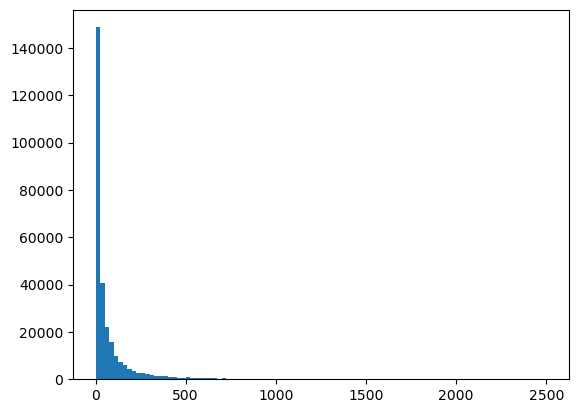

In [146]:
plt.hist(grouped_amountlow_class0_df['Amount'], bins=100)
plt.show()

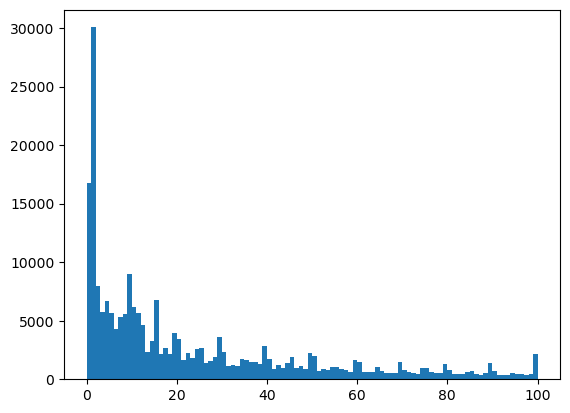

In [147]:
plt.hist(grouped_amountlow_class0_df['Amount'],range =(0,100),  bins=100)
plt.show()

Time
NF


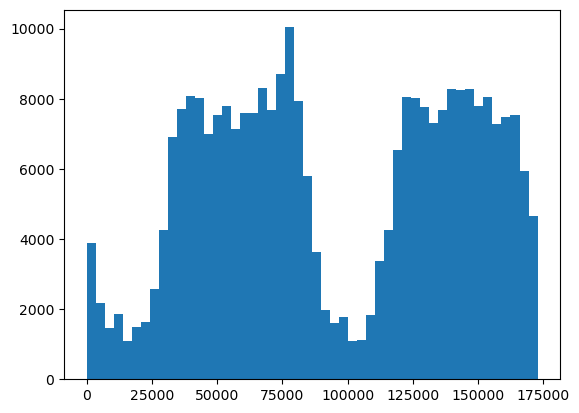

F


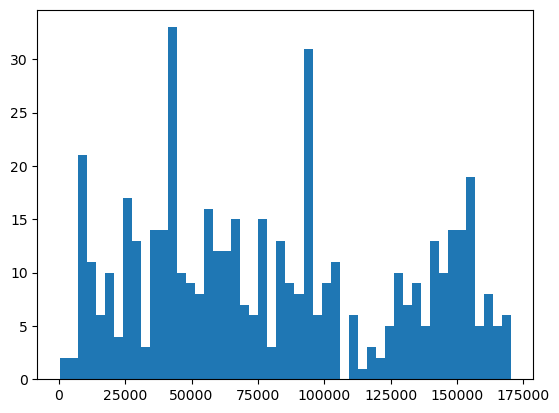

V1
NF


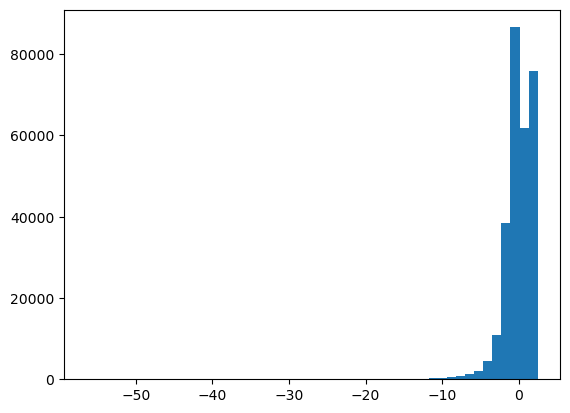

F


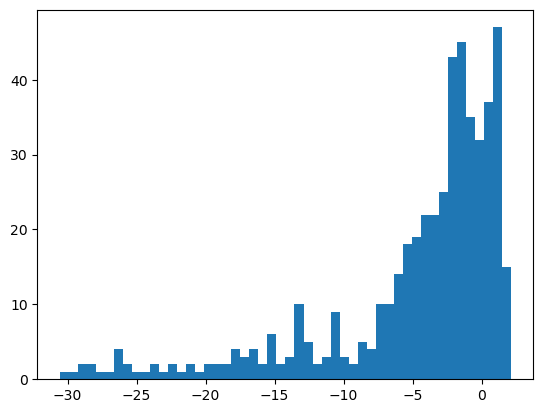

V2
NF


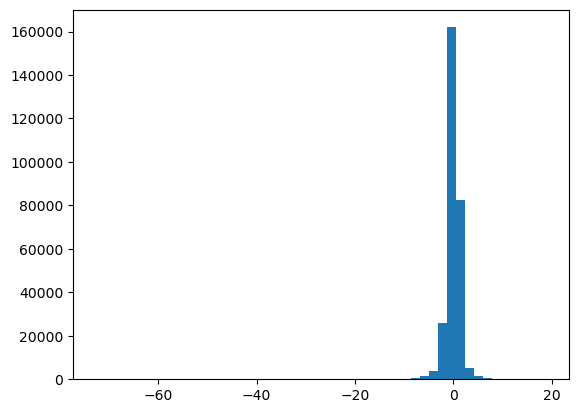

F


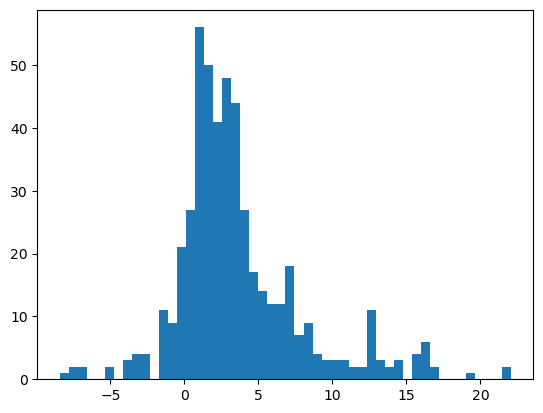

V3
NF


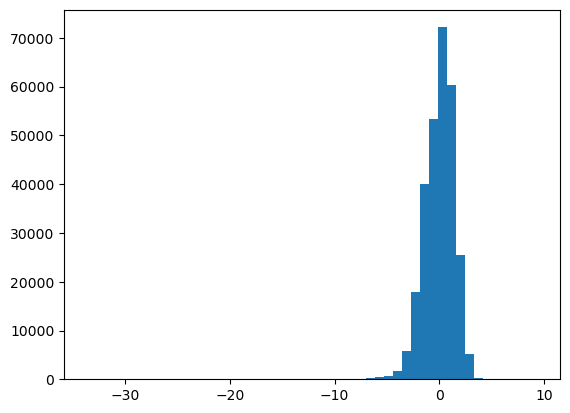

F


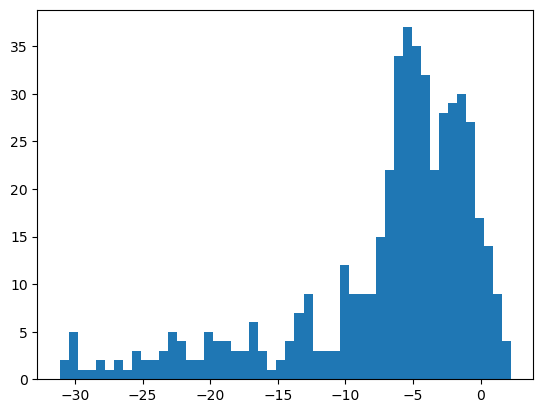

V4
NF


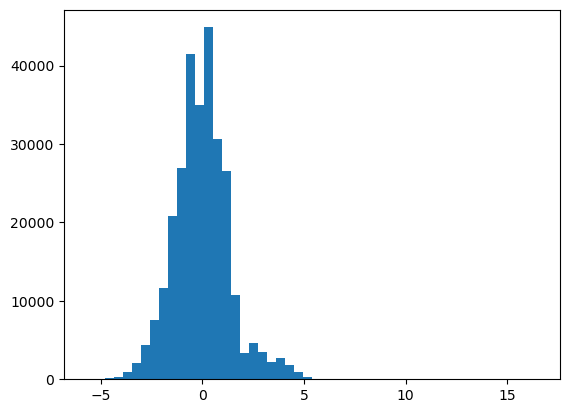

F


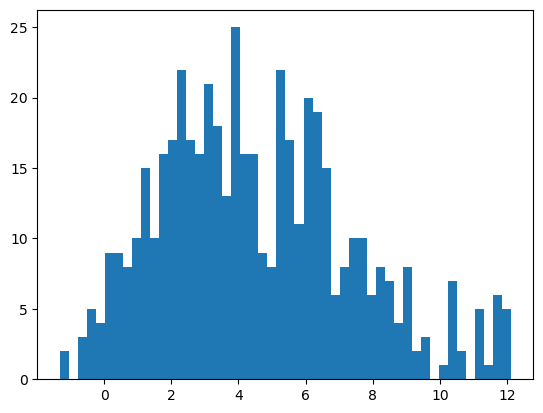

V5
NF


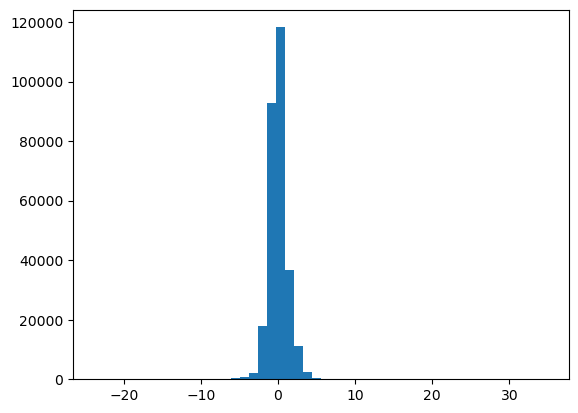

F


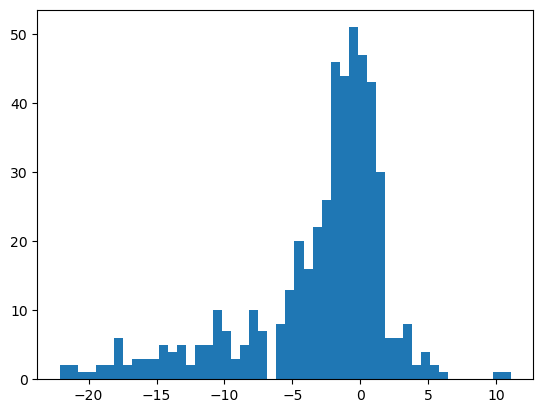

V6
NF


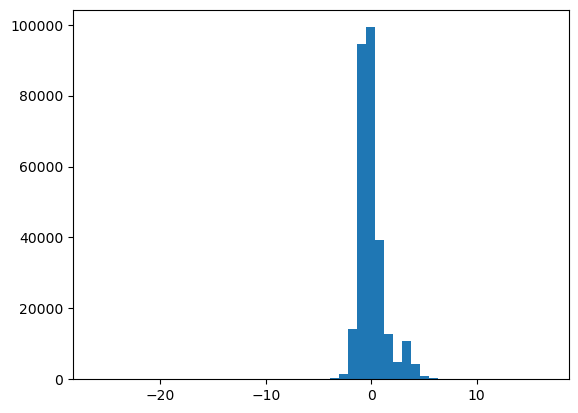

F


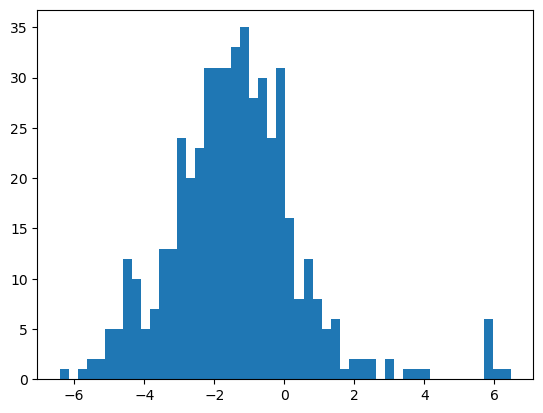

V7
NF


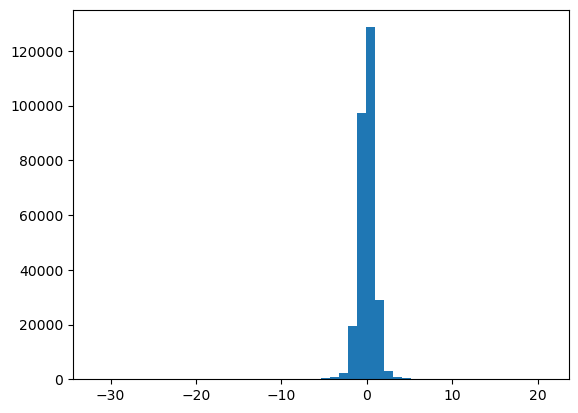

F


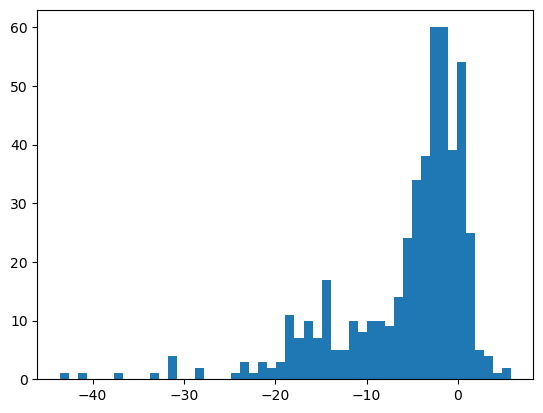

V8
NF


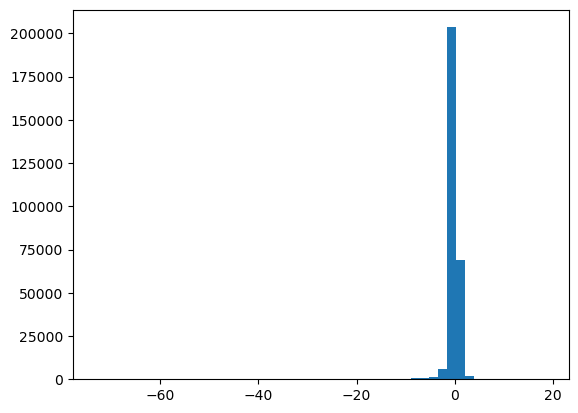

F


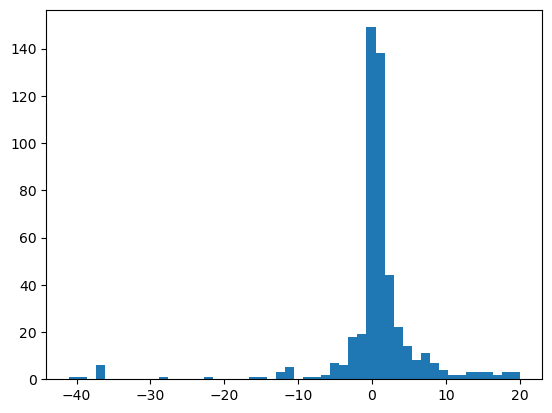

V9
NF


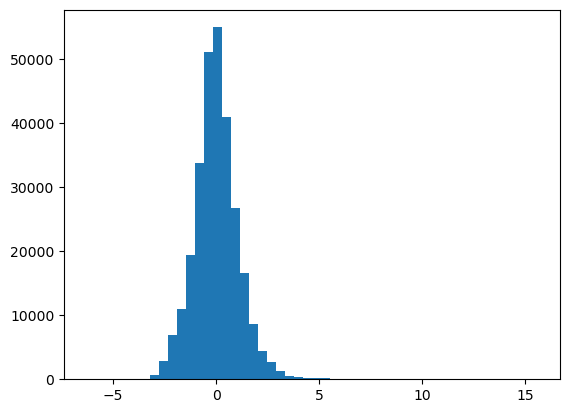

F


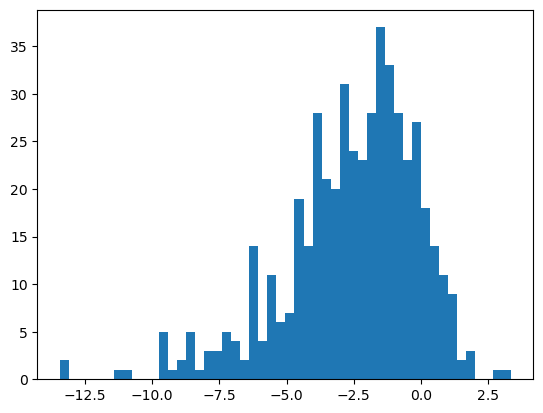

V10
NF


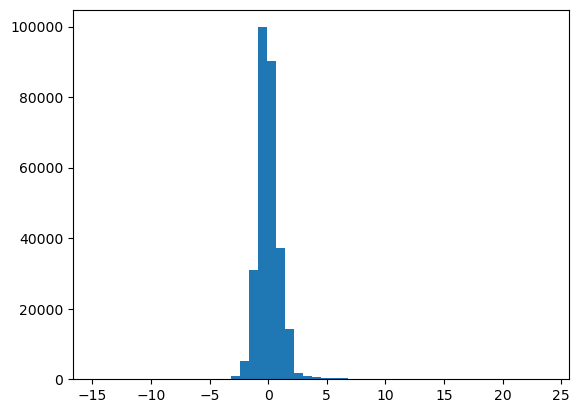

F


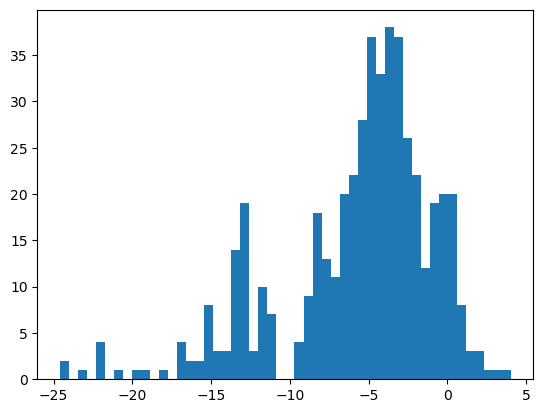

V11
NF


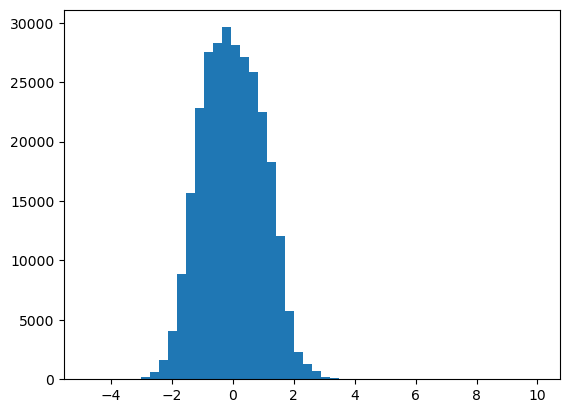

F


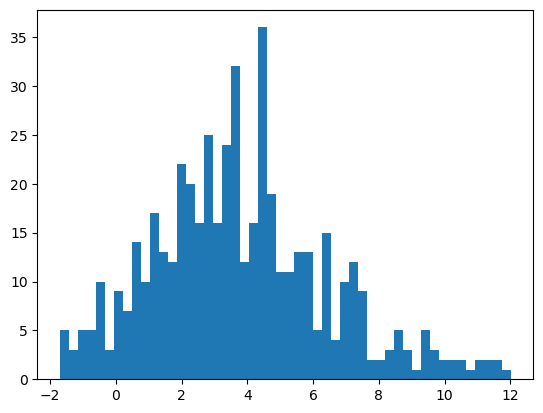

V12
NF


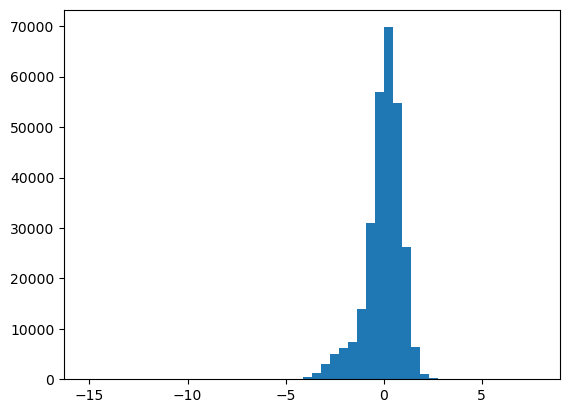

F


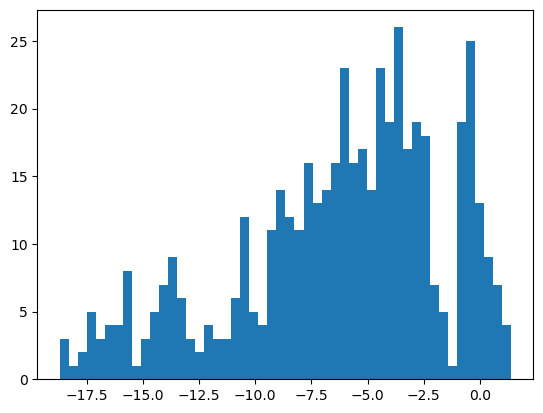

V13
NF


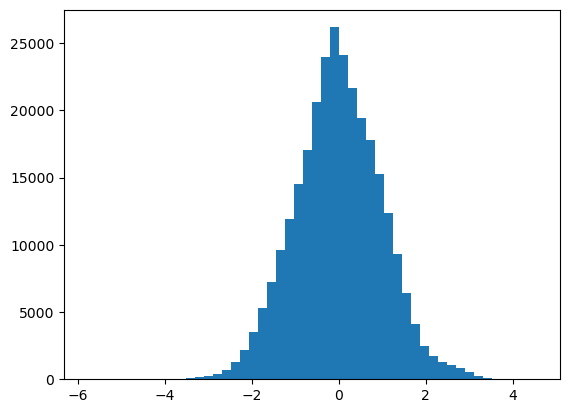

F


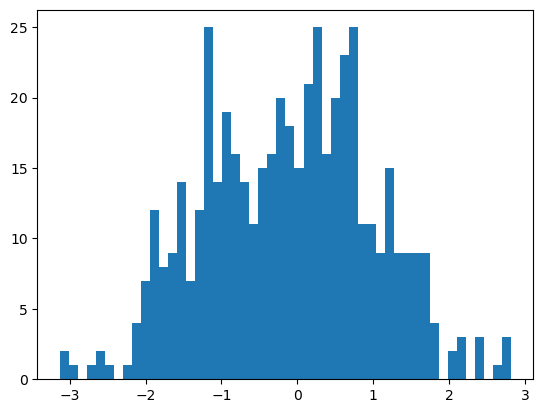

V14
NF


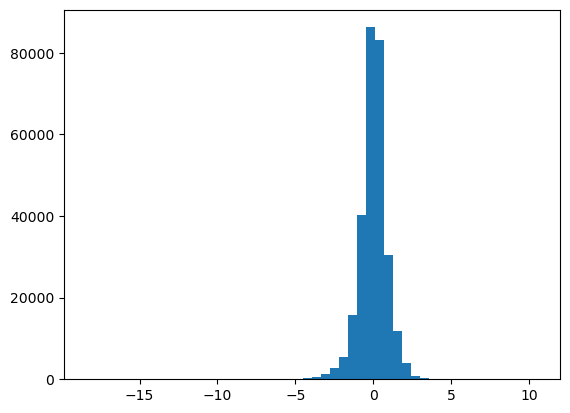

F


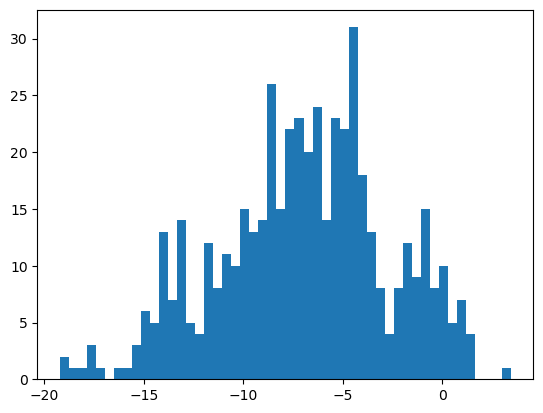

V15
NF


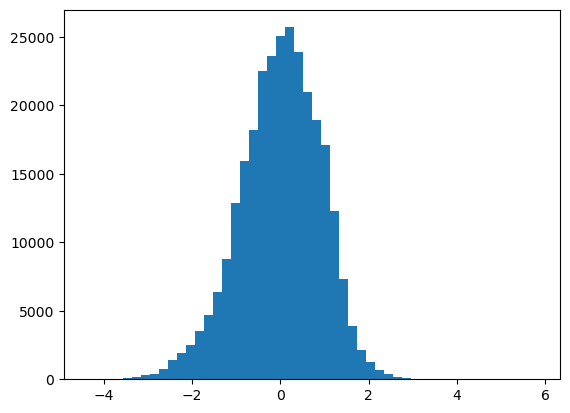

F


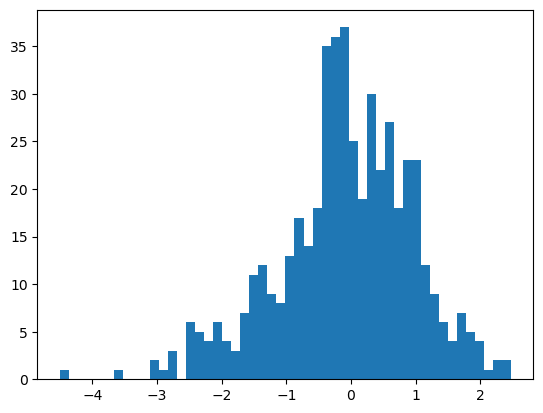

V16
NF


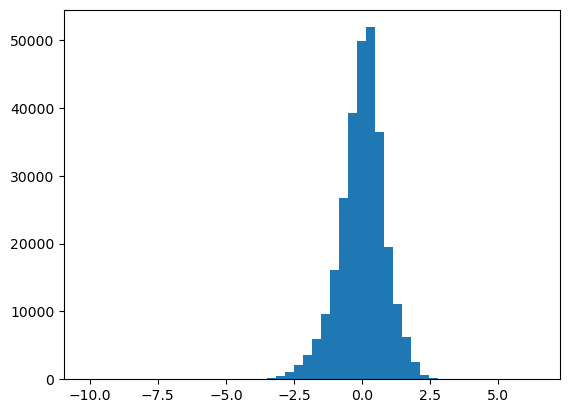

F


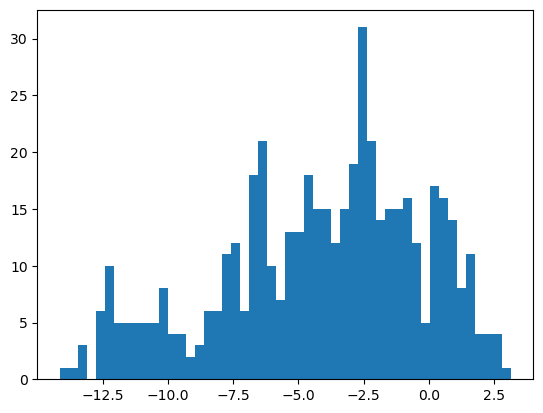

V17
NF


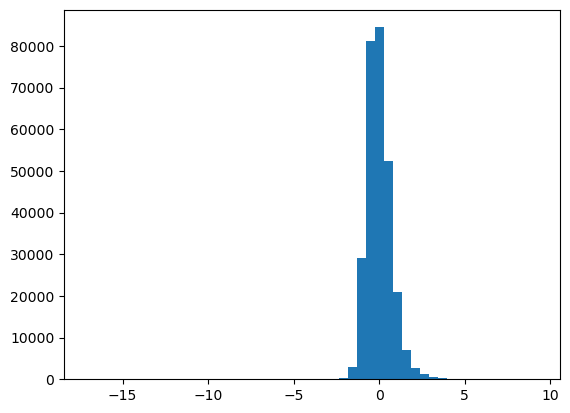

F


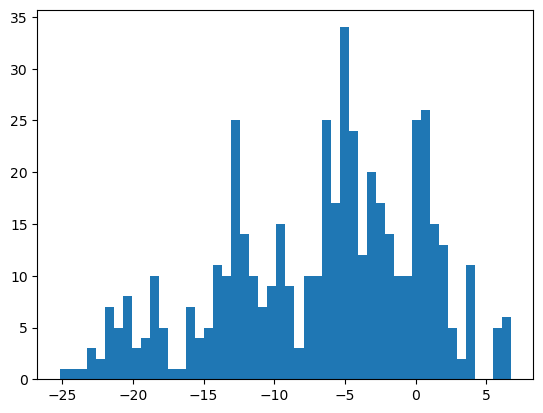

V18
NF


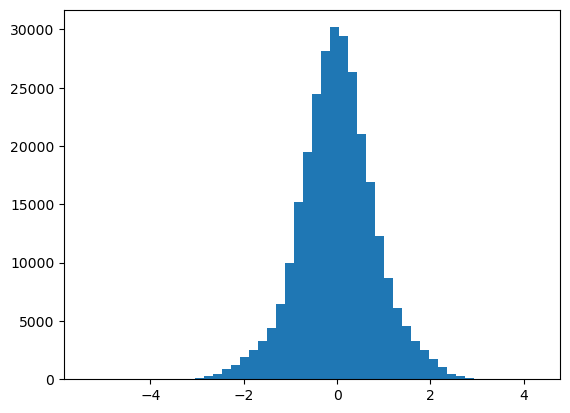

F


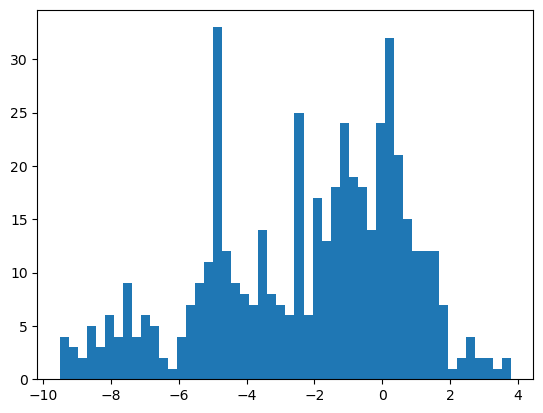

V19
NF


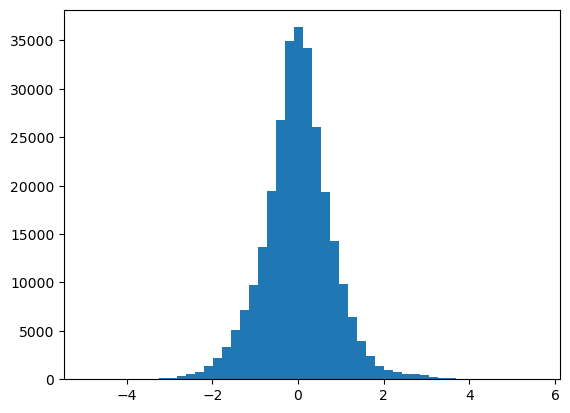

F


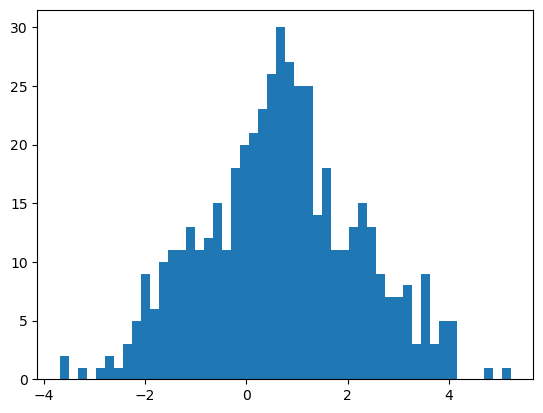

V20
NF


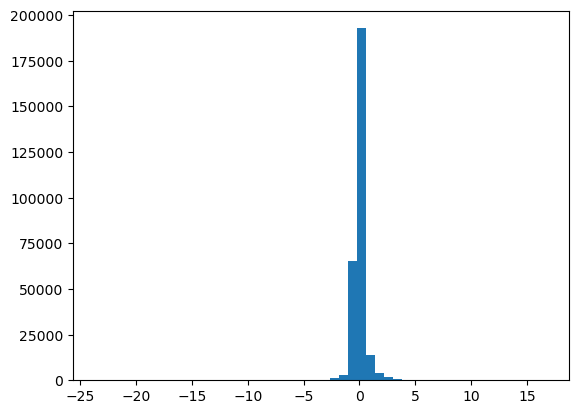

F


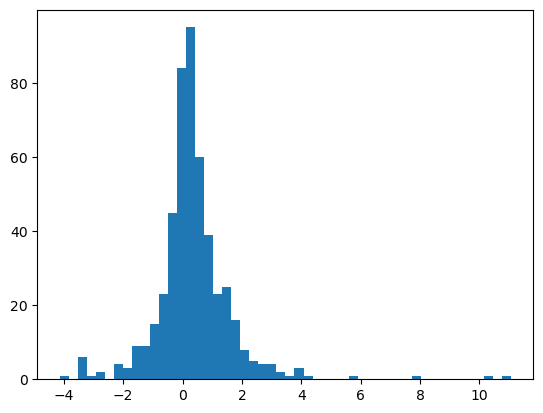

V21
NF


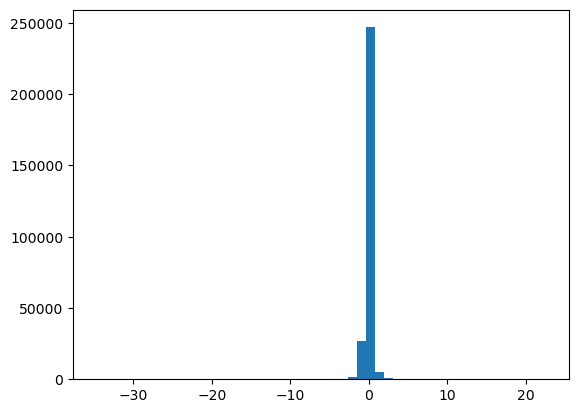

F


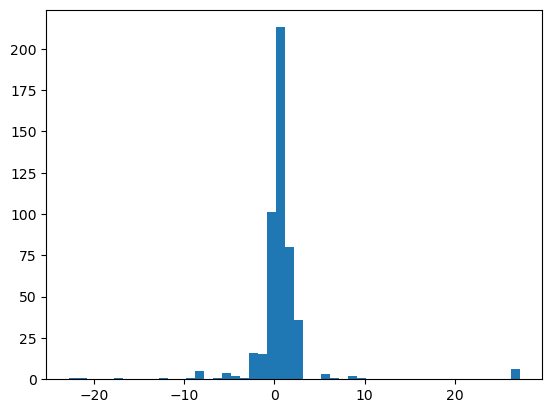

V22
NF


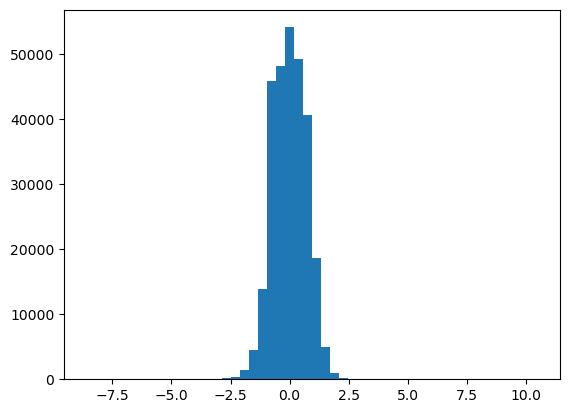

F


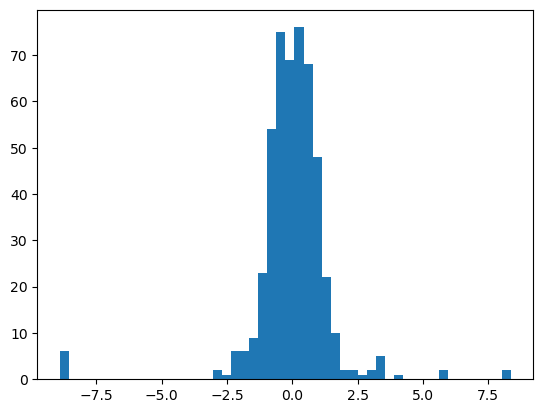

V23
NF


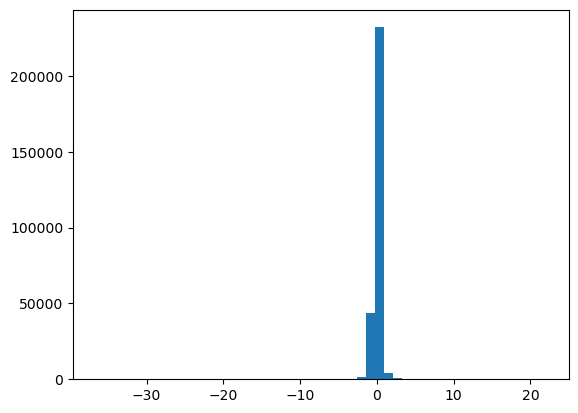

F


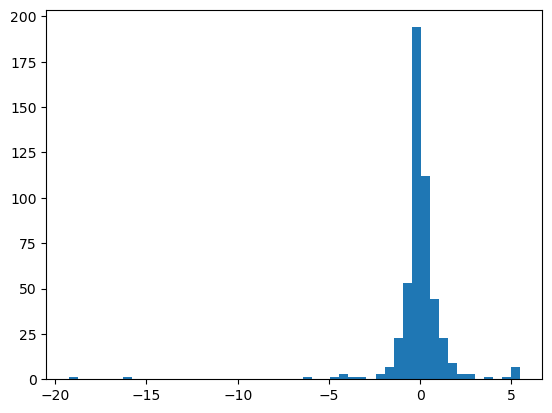

V24
NF


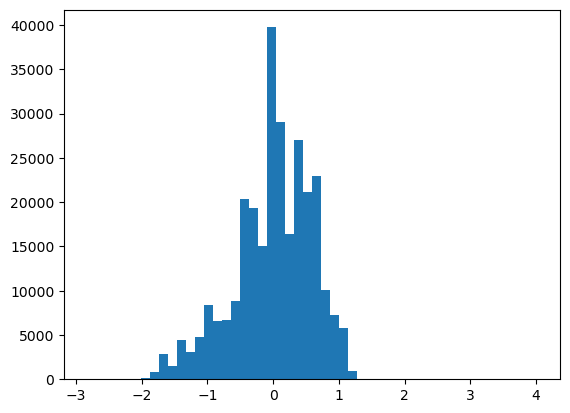

F


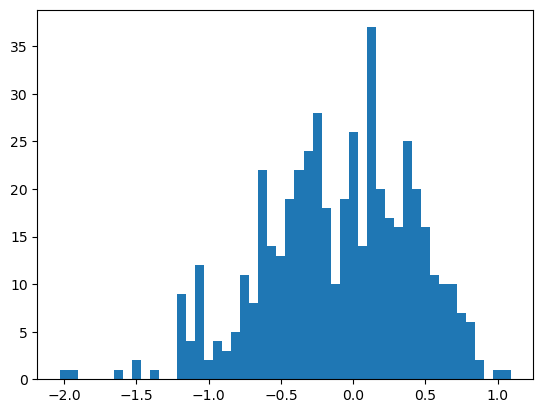

V25
NF


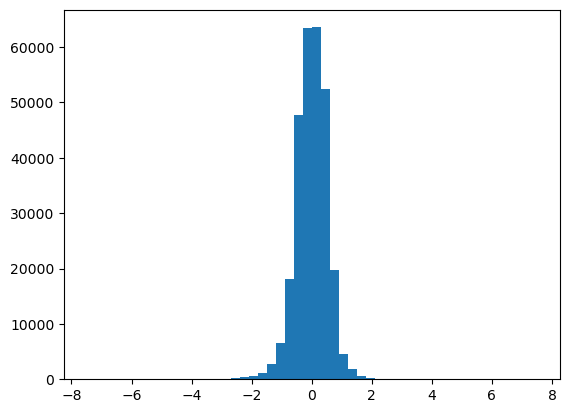

F


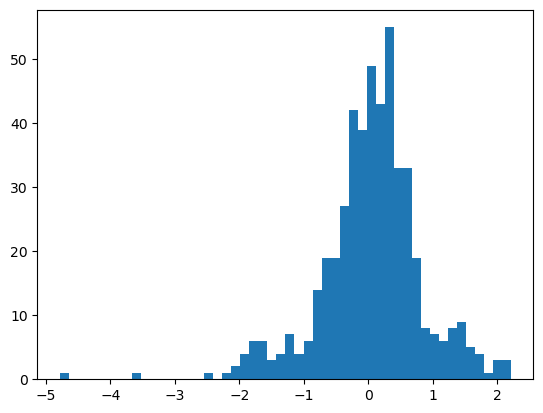

V26
NF


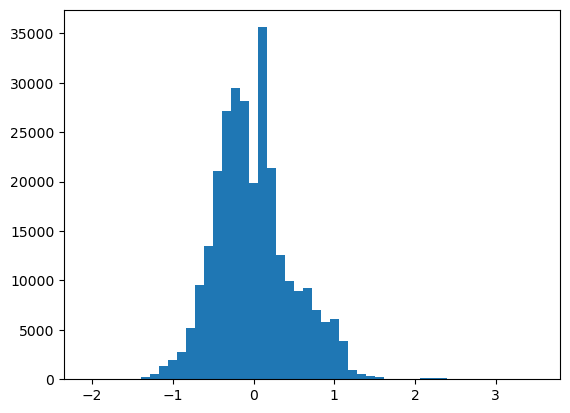

F


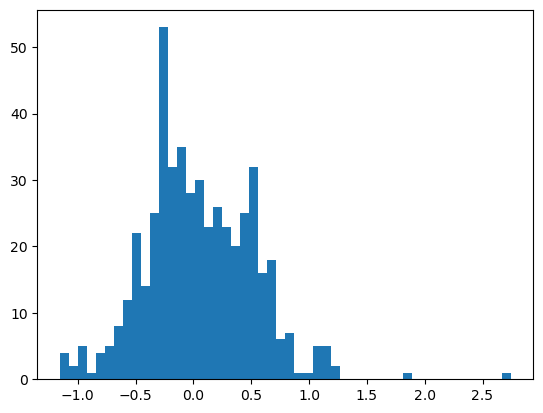

V27
NF


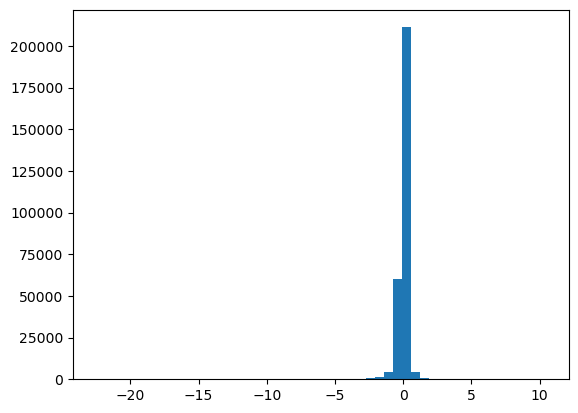

F


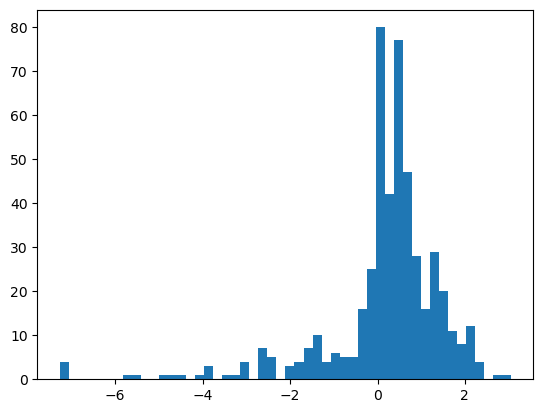

V28
NF


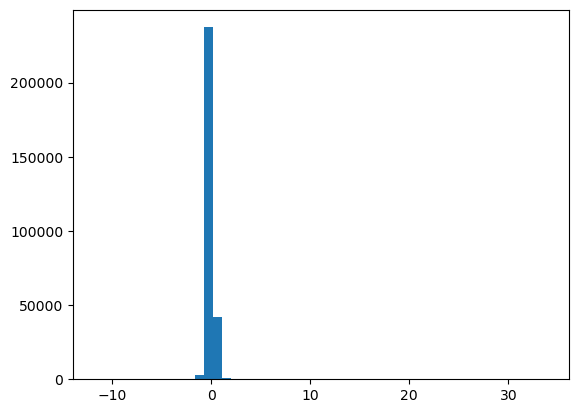

F


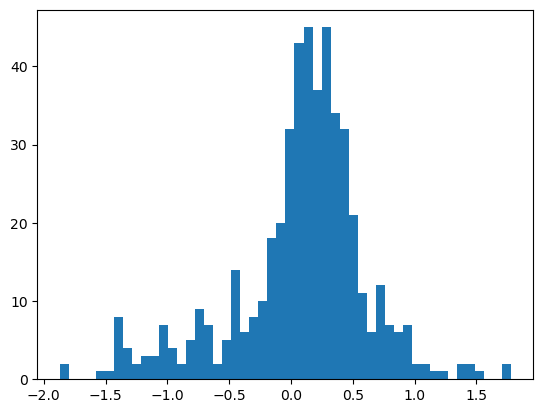

Amount
NF


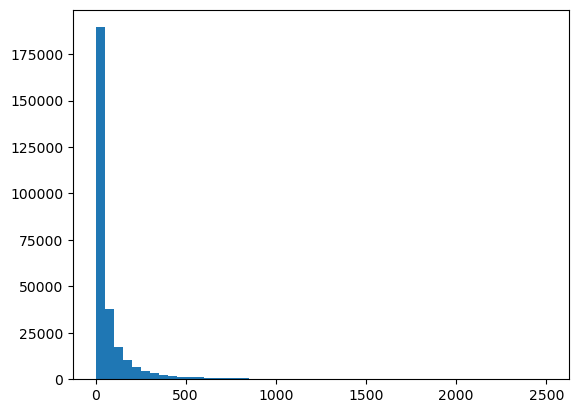

F


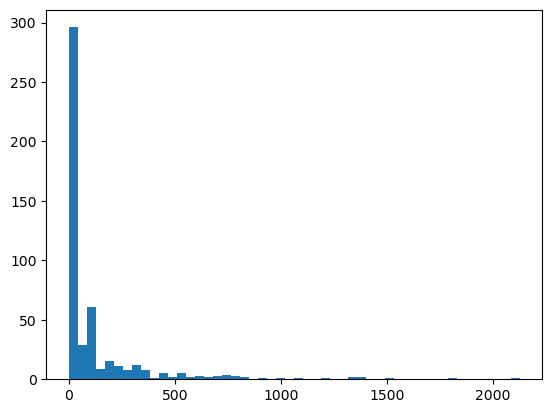

Class
NF


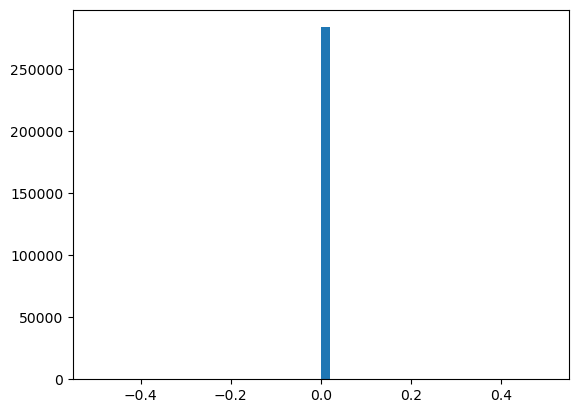

F


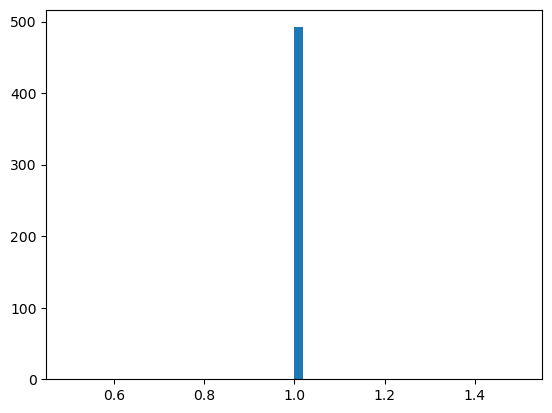

In [148]:
for x in col1:
    print(x)
    print('NF')
    plt.hist(grouped_amountlow_class0_df[x], bins=50)
    plt.show()
    print('F')
    plt.hist(grouped_amountlow_class1_df[x], bins=50)
    plt.show()

# Feature Selection

In [149]:
selected_col = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V27', 'V28', 'Amount',
       'Class']

In [150]:
X_col = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V27', 'V28', 'Amount']

In [151]:
grouped_amountlow_df[selected_col].head(5)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V27  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412  0.133558   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.008983   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980 -0.055353   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038  0.062723   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542  0.219422   

        V28  Amount  Class  
0 -0.021053  149.62      0  
1  0.014724    2.69      0  
2 -0.059752  378.66      0  
3  0.061458  123.50      0  
4  0.215153   69.99      0

In [152]:
fin_df = grouped_amountlow_df[selected_col]

In [153]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.25)


In [154]:
for train_index, test_index in sss.split(fin_df, fin_df['Class']):
    train_df = fin_df.iloc[train_index]
    test_df = fin_df.iloc[test_index]

In [155]:
test_df.sample(5)

Time        V1        V2        V3        V4        V5        V6  \
199638  133066.0  1.632963 -0.454225 -1.251555  0.802849 -0.402618 -1.787216   
275570  166609.0 -0.656957  0.135096  0.147130 -0.439677  0.882057 -1.330869   
152749   97454.0  1.968339 -0.457695 -0.026263  0.426034 -0.649475 -0.044792   
94969    65110.0  1.220952  0.296030  0.187924  0.503387 -0.128325 -0.548591   
229585  145980.0  2.111527  0.020622 -1.328536  0.242233  0.303329 -0.788895   

              V7        V8        V9       V10       V11       V12       V13  \
199638  0.817912 -0.612433  0.312360 -0.193614  0.240542  1.502746  1.161998   
275570  0.821782 -0.214871  0.109833 -0.260085 -1.072452  0.006585 -0.092807   
152749 -0.894044 -0.070580  2.584137 -0.426006 -0.400177 -1.930251  2.818820   
94969   0.013126 -0.059149 -0.262493 -0.128171  1.403037  1.015258  0.575585   
229585  0.254311 -0.361237  0.401152  0.037811 -1.147775  0.869919  1.424883   

             V14       V15       V16       V17       V18       V19       V20  \
199638  0.292494 -0.181305 -0.868113  0.033586 -1.047425 -0.232550  0.191625   
275570  0.084150 -0.319985 -0.024931 -0.478781 -0.663763  0.038077 -0.163423   
152749  0.903670 -0.011492  0.797002 -0.200345  0.422549 -0.269828 -0.083264   
94969  -0.183460  0.377345  0.754172 -0.396585  0.258930  0.209708 -0.018298   
229585 -0.012724 -0.045460  0.038206 -0.610133 -0.796242  0.398153 -0.122207   

             V27       V28  Amount  Class  
199638 -0.053676 -0.013643  197.42      0  
275570  0.202537  0.021536    1.29      0  
152749 -0.039745 -0.044119   39.00      0  
94969  -0.026416  0.019548    9.98      0  
229585 -0.063569 -0.064250    1.98      0

In [156]:
train_df['Class'].describe()

count    213275.000000
mean          0.001730
std           0.041559
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

In [157]:
test_df['Class'].describe()

count    71092.000000
mean         0.001730
std          0.041559
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Class, dtype: float64

*Smote*

In [158]:
X_train_df = train_df[X_col]
y_train_df = train_df['Class']

In [159]:
X_test_df = test_df[X_col]
y_test_df = test_df['Class']

In [160]:
y_train_df.describe()

count    213275.000000
mean          0.001730
std           0.041559
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

In [161]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train_df, y_train_df)


In [162]:
X_train_smote.describe()

Time             V1             V2             V3  \
count  425812.000000  425812.000000  425812.000000  425812.000000   
mean    88021.696844      -2.478241       1.945688      -3.632104   
std     48188.475489       5.401441       3.630685       6.080230   
min         0.000000     -56.407510     -72.715728     -33.680984   
25%     46030.599104      -3.090927      -0.099079      -5.185304   
50%     82260.500000      -0.829828       1.034256      -1.567668   
75%    134572.838416       0.847202       2.952570       0.275437   
max    172792.000000       2.454930      22.057729       9.382558   

                  V4             V5             V6             V7  \
count  425812.000000  425812.000000  425812.000000  425812.000000   
mean        2.337983      -1.583230      -0.693912      -3.007390   
std         3.129036       4.048513       1.698194       5.865842   
min        -5.683171     -23.669726     -26.160506     -43.557242   
25%        -0.048533      -1.839596      -1.521650      -3.344554   
50%         1.493651      -0.435024      -0.678878      -0.762041   
75%         4.358187       0.409639       0.037063       0.181657   
max        16.491217      34.801666      16.614054      19.553200   

                  V8             V9            V10            V11  \
count  425812.000000  425812.000000  425812.000000  425812.000000   
mean        0.095054      -1.340551      -2.925914       1.924472   
std         5.007914       2.277686       4.519385       2.689904   
min       -73.216718     -13.434066     -24.588262      -4.682931   
25%        -0.220083      -2.331971      -4.640663      -0.125775   
50%         0.151684      -0.795340      -1.013712       1.199687   
75%         0.841290       0.084199      -0.032280       3.570831   
max        20.007208      15.594995      23.745136      12.018913   

                 V12            V13            V14            V15  \
count  425812.000000  425812.000000  425812.000000  425812.000000   
mean       -3.162914      -0.050547      -3.548285      -0.063922   
std         4.443266       0.999261       4.545351       0.944161   
min       -18.683715      -5.791881     -19.214325      -4.498945   
25%        -5.548687      -0.725468      -6.854224      -0.592519   
50%        -1.173269      -0.035634      -1.272550      -0.017875   
75%         0.169930       0.612551       0.077710       0.598355   
max         7.848392       4.569009      10.526766       5.825654   

                 V16            V17            V18            V19  \
count  425812.000000  425812.000000  425812.000000  425812.000000   
mean       -2.088242      -3.346221      -1.121842       0.338584   
std         3.305741       5.635133       2.266093       1.181320   
min       -14.129855     -24.019099      -9.498746      -4.676092   
25%        -3.625021      -5.598960      -1.886383      -0.390270   
50%        -0.742641      -0.628292      -0.394629       0.210185   
75%         0.220403       0.159365       0.301955       0.949283   
max         6.442798       7.766636       4.243841       5.591971   

                 V20            V27            V28         Amount  
count  425812.000000  425812.000000  425812.000000  425812.000000  
mean        0.196086       0.060109       0.035818      90.627512  
std         1.055019       1.013144       0.416957     183.222222  
min       -23.646890     -22.565679     -11.710896       0.000000  
25%        -0.185264      -0.066977      -0.059014       3.331476  
50%         0.048109       0.057710       0.034857      24.990000  
75%         0.458053       0.435615       0.211276      99.865942  
max        16.756448      10.507884      33.847808    2500.000000

In [163]:
y_train_smote.describe()

count    425812.000000
mean          0.500000
std           0.500001
min           0.000000
25%           0.000000
50%           0.500000
75%           1.000000
max           1.000000
Name: Class, dtype: float64

After performing EDA, we found  certain feautures that are more important by observing some outliers which are fruad

# Logistic Regression

In [191]:


def tune_logistic_regression(X_train, y_train):
    # Define the hyperparameters and their respective ranges to be tested
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
        'penalty': ['l1', 'l2'],               # Norm used in the penalization
        'solver': ['liblinear']                # Algorithm to use for optimization
    }
    
    # Create a logistic regression model
    log_reg = LogisticRegression(max_iter=10000)
    
    # Define the scoring function
    scoring = make_scorer(f1_score)
    
    # Create the GridSearchCV object
    grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, scoring=scoring, cv=StratifiedKFold(n_splits=5))
    
    # Perform the grid search with the training data
    grid_search.fit(X_train, y_train)
    
    # Return the best model
    return grid_search.best_estimator_

# Example usage:
# best_model = tune_logistic_regression(X_train, y_train)
# print("Best model parameters:", best_model.get_params())


In [192]:
model1= tune_logistic_regression(X_train_smote, y_train_smote)

In [164]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train_smote, y_train_smote)


LogisticRegression(max_iter=10000)

In [193]:
model1.fit(X_train_smote, y_train_smote)

LogisticRegression(C=10, max_iter=10000, penalty='l1', solver='liblinear')

In [194]:
predictions = model1.predict(X_test_df)
print(classification_report(y_test_df, predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     70969
           1       0.14      0.89      0.24       123

    accuracy                           0.99     71092
   macro avg       0.57      0.94      0.62     71092
weighted avg       1.00      0.99      0.99     71092



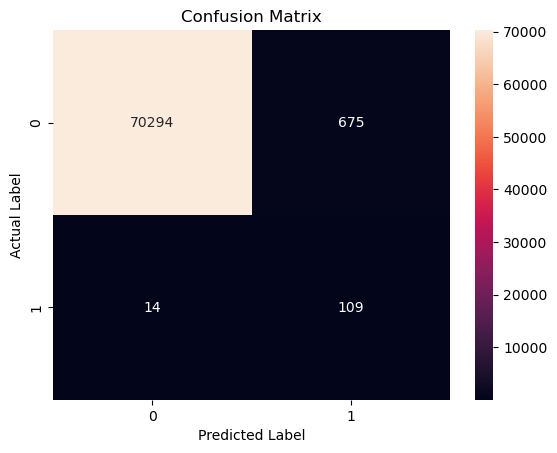

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     70969
           1       0.14      0.89      0.24       123

    accuracy                           0.99     71092
   macro avg       0.57      0.94      0.62     71092
weighted avg       1.00      0.99      0.99     71092

AUROC Score: 0.9808212952706823


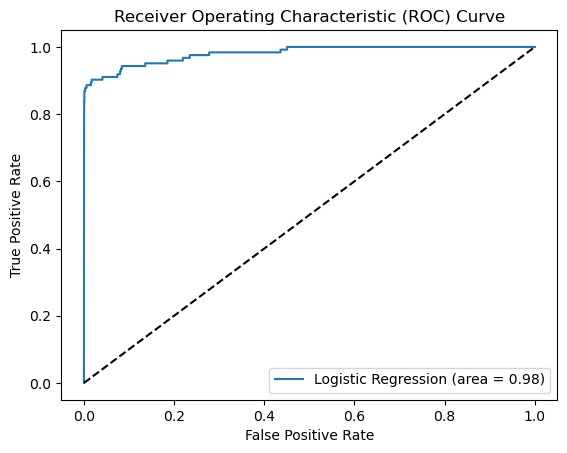

In [216]:

# Predictions
predictions = model1.predict(X_test_df)

# Confusion Matrix
cm = confusion_matrix(y_test_df, predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Classification Report
print(classification_report(y_test_df, predictions))

# AUROC Curve
# Compute predicted probabilities
y_pred_prob = model1.predict_proba(X_test_df)[:, 1]
# Calculate AUROC score
auroc_score = roc_auc_score(y_test_df, y_pred_prob)
print(f'AUROC Score: {auroc_score}')

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test_df, y_pred_prob)

# Plot ROC curve
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % auroc_score)
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


#In logistic regression we have done hyper parameter tunning to get 98.08% accuracy in ROC curve 

# Decision Tree

In [208]:
clf = DecisionTreeClassifier(criterion='gini', min_samples_leaf=30, random_state=0)

# Fit the model to the training data
clf.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(min_samples_leaf=30, random_state=0)

Here we have set a hyperparameterr of decision tree which is the minimum sample leaf =30 in order to avoid overfitting 

In [213]:
predictions1 = clf.predict(X_test_df)
print(classification_report(y_test_df, predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     70969
           1       0.06      0.89      0.12       123

    accuracy                           0.98     71092
   macro avg       0.53      0.93      0.55     71092
weighted avg       1.00      0.98      0.99     71092



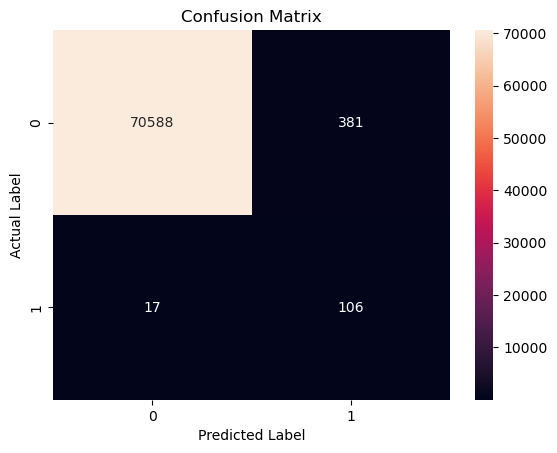

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70969
           1       0.55      0.87      0.68       123

    accuracy                           1.00     71092
   macro avg       0.78      0.93      0.84     71092
weighted avg       1.00      1.00      1.00     71092

AUROC Score: 0.9495246808207911


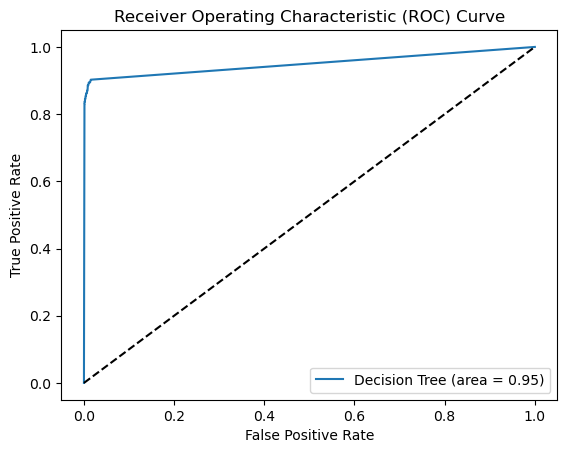

In [225]:



# Confusion Matrix
cm = confusion_matrix(y_test_df, predictions1)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Classification Report
print(classification_report(y_test_df, predictions))

# AUROC Curve
# Compute predicted probabilities
y_pred_prob =clf.predict_proba(X_test_df)[:, 1]
# Calculate AUROC score
auroc_score = roc_auc_score(y_test_df, y_pred_prob)
print(f'AUROC Score: {auroc_score}')

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test_df, y_pred_prob)

# Plot ROC curve
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % auroc_score)
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In decision tree we have selected the proper hyper parameters as minimum number of samples at leaf node =30 and we can observe 95% accuracy 

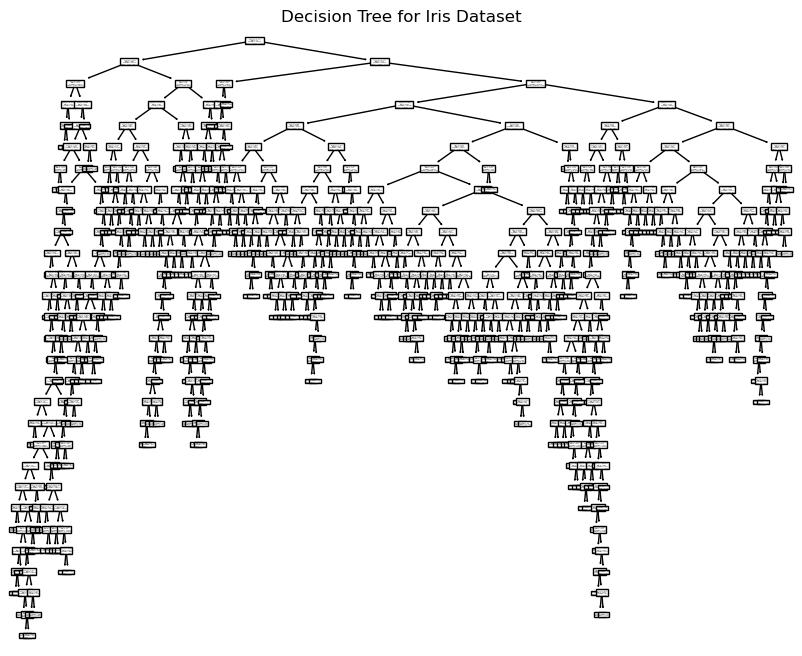

In [220]:

from sklearn.tree import DecisionTreeClassifier, plot_tree


# Plot the decision tree
plt.figure(figsize=(10, 8))
plot_tree(clf)
plt.title("Decision Tree for Iris Dataset")
plt.show()


# Random Forest

In [221]:
rf_clf = RandomForestClassifier(
    n_estimators=100, 
    max_depth=30,  # Set a finite max depth for each tree
    min_samples_leaf=30,  # Minimum number of samples required to be at a leaf node
    random_state=42
)
rf_clf.fit(X_train_smote, y_train_smote)

RandomForestClassifier(max_depth=30, min_samples_leaf=30, random_state=42)

In [222]:
predictions = rf_clf.predict(X_test_df)
print(classification_report(y_test_df, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70969
           1       0.55      0.87      0.68       123

    accuracy                           1.00     71092
   macro avg       0.78      0.93      0.84     71092
weighted avg       1.00      1.00      1.00     71092



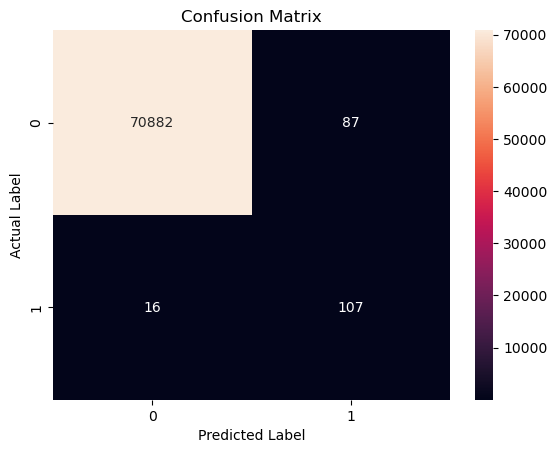

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70969
           1       0.55      0.87      0.68       123

    accuracy                           1.00     71092
   macro avg       0.78      0.93      0.84     71092
weighted avg       1.00      1.00      1.00     71092

AUROC Score: 0.9870255958544595


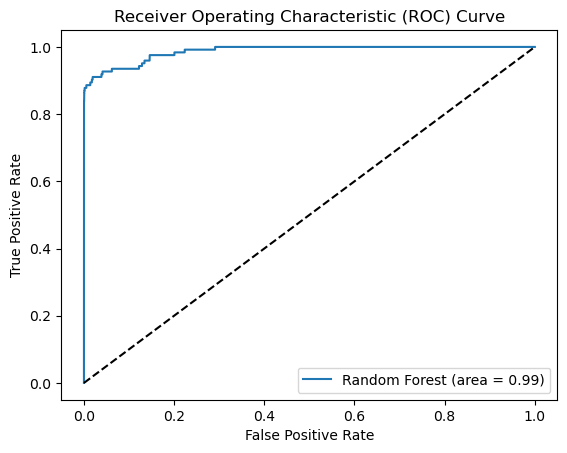

In [224]:
# Predictions
predictions = rf_clf.predict(X_test_df)

# Confusion Matrix
cm = confusion_matrix(y_test_df, predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Classification Report
print(classification_report(y_test_df, predictions))

# AUROC Curve
# Compute predicted probabilities
y_pred_prob = rf_clf.predict_proba(X_test_df)[:, 1]
# Calculate AUROC score
auroc_score = roc_auc_score(y_test_df, y_pred_prob)
print(f'AUROC Score: {auroc_score}')

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test_df, y_pred_prob)

# Plot ROC curve
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % auroc_score)
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In Random forest we have set proper hyper parameters as maximum depth = 30 and minimum sample at leaf =30 and we can observe accuracy rate is 99 % in ROC curve

#Conclusion

1.Random  Forest works as the best model for this data set.

2.We have got 99% accuracy in ROC curve  in Random Forest model. 

3.We can observe 98% accuracy in Logistic Regression which is better than previous result because the better outcome is caused by hyperparameter tunning in logistic Regression.

4.We also got  the accruacy rate of 95% in Decision Tree which is better indeed as hyperparameters setting being  administered ( Maximum depth =30 , Minimun number of samples at leaf node =30).

5.Frauds were not of high values in comparison to the normal transactions.

6.Maximum amount of fraud transaction was 2500-3000 in the native currency as per EDA.

7.There can be seen a rise in the Fraud transactions during the morning or early morning time period as it shows the  bimodal distribution.
